# Proyek Analisis Data: Air Data Kota Dingling
- **Nama:** Wildan Fadhil Nazaruddin
- **Email:** 232153079@student.unsil.ac.id
- **ID Dicoding:** 

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi di kota dingling dari tahun 2013 hingga 2017?
- Bagaimana tren suhu dan tekanan udara di dingling setiap bulan dari tahun 2013 hingga 2017?
- Bagaimana hubungan antara konsentrasi PM2.5 dan PM10 dengan suhu dan tekanan udara di dingling?
- Pada bulan dan jam berapa tingkat PM2.5 dan PM10 di kota dingling cenderung tinggi dari tahun 2013 hingga 2017?
- Bagaimana distribusi arah angin di kota dingling dari tahun 2013 hingga 2017?
- Bagaimana tren kecepatan angin di kota dingling setiap bulan dari tahun 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

Proses gathering dimulai dengan memuat data Kota Dingling yang menampilkan data yang berasal dari file (.csv) data sumber

In [61]:
dingling = pd.read_csv(r"C:\Users\wilda\OneDrive\WILDAN FADHIL NAZARUDDIN\PROJECK\latihan data scientis\submission\data\PRSA_Data_Dingling_20130301-20170228.csv")


melihat data yang ada 


In [62]:
dingling.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [63]:
dingling.info

<bound method DataFrame.info of           No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0   82.0   
1          2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0   80.0   
2          3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0   79.0   
3          4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0   79.0   
4          5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0   81.0   
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...    ...   
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM 

### Assessing Data

#### Dingling

Penilaian data dilakukan dengan mencari informasi tentang data, termasuk jenis data setiap variabel

In [64]:
dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Langkah selanjutnya adalah mengidentifikasi variabel yang tidak memiliki nilai

In [65]:
dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

menampilkan analisis deskriptif dari data set

In [66]:
dingling.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

### Cleaning Data

#### Dingling

Selanjutnya dilakukan pengisian parameter variable yang kosong seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, DEWP, RAIN, wd, WSPM. variable yang kosong ini diasumsikan merupakan variable yang sulit mengalami perubahan secara mendadak sehingga dapat diasumsikan nilainya sama dengan nilai sebelumnya

In [69]:
dingling = dingling.fillna(method='bfill')


C:\Users\wilda\AppData\Local\Temp\ipykernel_3808\456703919.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dingling = dingling.fillna(method='bfill')


In [70]:
# Pengecekan elemen variable yang kosong kembali
dingling.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

merubah data frame menjadi date_time

In [71]:
dingling.drop(['No', 'station'], axis=1, inplace=True)


## Exploratory Data Analysis (EDA)

### Explore ...

#### Dingling

##### Tingkat polusi udara di dingling

- Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
- Selama 10 hari pada tanggal 2014-06-01 sampai 2014-06-10 (10 data pertama)
- Selama 10 bulan pada tanggal 2015-01 sampai 2015-10 (10 data pertama)
- Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)
- tingkat polusi udara dalam waktu satu hari (24 jam) untuk semua waktu dari tahun 2013 hingga 2017
- tingkat polusi udara dalam waktu satu minggu (7 hari) untuk semua waktu dari tahun 2013 hingga 2017
- tingkat polusi udara dalam waktu satu bulan ( 30 hari) untuk semua waktu dari tahun 2013 hingga 2017
- tingkat polusi udara dalam waktu tiap bulan(12 bulan) untuk semua waktu dari tahun 2013 hingga 2017

In [72]:
# tingkat polusi selama 24 jam dengan contoh 20 jam pada tanggal 2013-03-01 sampai 19-00
dingling_polusi_harian = dingling.groupby(by=['year', 'month', 'day', 'hour']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
}).sort_values(by=['year', 'month', 'day', 'hour'], ascending=True)

# Reset index
dingling_polusi_harian = dingling_polusi_harian.reset_index()

# Create date_time column
dingling_polusi_harian['date_time'] = pd.to_datetime(dingling_polusi_harian[['year', 'month', 'day', 'hour']])

# Set date_time as index
dingling_polusi_harian = dingling_polusi_harian.set_index('date_time')

# Drop the year, month, day, and hour columns as they are no longer needed
dingling_polusi_harian = dingling_polusi_harian.drop(columns=['year', 'month', 'day', 'hour'])
dingling_polusi_harian.head(20)

PM2.5  PM10  SO2  NO2     CO    O3
date_time                                              
2013-03-01 00:00:00    4.0   4.0  3.0  2.0  200.0  82.0
2013-03-01 01:00:00    7.0   7.0  3.0  2.0  200.0  80.0
2013-03-01 02:00:00    5.0   5.0  3.0  2.0  200.0  79.0
2013-03-01 03:00:00    6.0   6.0  3.0  4.0  200.0  79.0
2013-03-01 04:00:00    5.0   5.0  3.0  4.0  200.0  81.0
2013-03-01 05:00:00    6.0   6.0  3.0  4.0  200.0  79.0
2013-03-01 06:00:00    5.0  10.0  3.0  4.0  200.0  77.0
2013-03-01 07:00:00    5.0   6.0  3.0  2.0  200.0  80.0
2013-03-01 08:00:00    8.0   7.0  3.0  3.0  200.0  79.0
2013-03-01 09:00:00    8.0   8.0  3.0  2.0  200.0  81.0
2013-03-01 10:00:00    8.0   2.0  3.0  2.0  200.0  83.0
2013-03-01 11:00:00    3.0   2.0  3.0  2.0  200.0  83.0
2013-03-01 12:00:00    6.0   7.0  3.0  2.0  200.0  85.0
2013-03-01 13:00:00    7.0   7.0  3.0  2.0  200.0  84.0
2013-03-01 14:00:00    6.0   7.0  3.0  2.0  200.0  89.0
2013-03-01 15:00:00   10.0  10.0  3.0  2.0  200.0  88.0
2013-03-01 16:00:00    3.0   6.0  3.0  2.0  200.0  87.0
2013-03-01 17:00:00    5.0   5.0  3.0  2.0  200.0  87.0
2013-03-01 18:00:00    5.0   6.0  3.0  2.0  200.0  85.0
2013-03-01 19:00:00   14.0   6.0  3.0  2.0  200.0  83.0

In [73]:
#tingkat polusi selama 24 jam dan mengambil contoh 2014 bulan 6 -1  sampai 2014-06-14
dingling_polusi_mingguan = dingling.groupby(by=['year', 'month', 'day']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
}).sort_values(by=['year', 'month', 'day'], ascending=True)

dingling_polusi_mingguan = dingling_polusi_mingguan.reset_index()
dingling_polusi_mingguan['date_time'] = pd.to_datetime(dingling_polusi_mingguan[['year', 'month', 'day']])
dingling_polusi_mingguan = dingling_polusi_mingguan.set_index('date_time')

# Memfilter data berdasarkan rentang tanggal
start_date = '2014-06-01'
end_date = '2014-06-14'
dingling_polusi_mingguan = dingling_polusi_mingguan.loc[start_date:end_date]

# Pembulatan nilai ke bilangan bulat
dingling_polusi_mingguan = dingling_polusi_mingguan.round(0)

# Menghapus kolom yang tidak diperlukan
dingling_polusi_mingguan = dingling_polusi_mingguan.drop(columns=['year', 'month', 'day'])

# Menampilkan 10 data pertama dari hasil yang sudah difilter
dingling_polusi_mingguan.head(10)


PM2.5  PM10   SO2   NO2     CO     O3
date_time                                        
2014-06-01   32.0  33.0   2.0   9.0  358.0  145.0
2014-06-02   19.0  22.0   2.0   8.0  171.0  109.0
2014-06-03   29.0  40.0   8.0  14.0  308.0  134.0
2014-06-04   50.0  63.0   7.0  20.0  550.0  140.0
2014-06-05   47.0  54.0  12.0  14.0  400.0  155.0
2014-06-06   34.0  40.0   4.0  13.0  367.0   81.0
2014-06-07    5.0  11.0   2.0   4.0  100.0   82.0
2014-06-08   11.0  19.0   2.0  14.0  125.0   73.0
2014-06-09   17.0  32.0   8.0  16.0  342.0   94.0
2014-06-10   42.0  37.0   2.0  14.0  496.0   79.0

In [74]:
dingling_polusi_bulanan = dingling.groupby(by=['year', 'month']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
}).sort_values(by=['year', 'month'], ascending=True)

dingling_polusi_bulanan = dingling_polusi_bulanan.reset_index()
dingling_polusi_bulanan['date_time'] = pd.to_datetime(dingling_polusi_bulanan[['year', 'month']].assign(day=1))
dingling_polusi_bulanan = dingling_polusi_bulanan.set_index('date_time')

start_date = '2015-01'
end_date = '2015-10'
dingling_polusi_bulanan = dingling_polusi_bulanan.loc[start_date:end_date]

# Pembulatan nilai ke bilangan bulat
dingling_polusi_bulanan = dingling_polusi_bulanan.round(0)

# Menghapus kolom yang tidak diperlukan
dingling_polusi_bulanan = dingling_polusi_bulanan.drop(columns=['year', 'month'])

# Menampilkan 10 data pertama dari hasil yang sudah difilter
dingling_polusi_bulanan.head(10)

PM2.5   PM10   SO2   NO2      CO     O3
date_time                                          
2015-01-01   85.0   93.0  28.0  45.0  1458.0   32.0
2015-02-01   81.0  104.0  24.0  28.0  1200.0   54.0
2015-03-01   75.0  126.0  15.0  27.0   893.0   72.0
2015-04-01   56.0   93.0   7.0  21.0   529.0   93.0
2015-05-01   46.0   85.0   7.0  16.0   542.0  109.0
2015-06-01   51.0   69.0   7.0  15.0   633.0  106.0
2015-07-01   49.0   64.0   5.0  17.0   482.0  103.0
2015-08-01   35.0   57.0   6.0  14.0   614.0  104.0
2015-09-01   38.0   48.0   4.0  17.0   587.0   78.0
2015-10-01   52.0   67.0   8.0  25.0   843.0   63.0

In [75]:
# Tingkat polusi selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)
dingling_polusi_tahunan = dingling.groupby(by=['year']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
}).sort_values(by=['year'], ascending=True)

dingling_polusi_tahunan = dingling_polusi_tahunan.reset_index()
dingling_polusi_tahunan['time'] = dingling_polusi_tahunan['year'].astype(str)

dingling_polusi_tahunan = dingling_polusi_tahunan.round(0)
dingling_polusi_tahunan = dingling_polusi_tahunan.drop(columns=['year'])
# Menampilkan 5 data pertama
dingling_polusi_tahunan.head(5)


PM2.5  PM10   SO2   NO2      CO    O3  time
0   64.0  78.0  14.0  29.0   939.0  65.0  2013
1   75.0  92.0  15.0  27.0   889.0  73.0  2014
2   64.0  85.0  11.0  27.0   964.0  71.0  2015
3   60.0  81.0   7.0  25.0   875.0  69.0  2016
4   68.0  79.0  13.0  34.0  1157.0  54.0  2017

##### Tren suhu dan tekanan udara di dingling setiap hari,minggu,bulan dan tahun dari tahun 2013 hingga 2017

- Selama 23 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
- Selama 21 hari pada tanggal 2014-09-01 sampai 2019-09-21(22 data pertama)
- Selama 11 bulan pada tanggal 2016-01 sampai 2016-11 (12 data pertama)
- Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)

In [76]:
# Suhu dan tekanan udara selama 23 jam tanggal 2013-03-01 00.00-19.00
dingling_parameters_harian = dingling.groupby(by=['year', 'month', 'day', 'hour']).agg({
    "TEMP": "mean",
    "PRES": "mean"
}).sort_values(by=['year', 'month', 'day', 'hour'], ascending=True)
dingling_parameters_harian = dingling_parameters_harian.reset_index()
dingling_parameters_harian['date_time'] = dingling_parameters_harian["hour"].astype(str) + ":00"
dingling_parameters_harian = dingling_parameters_harian.set_index('date_time')
dingling_parameters_harian = dingling_parameters_harian.drop(columns=['year', 'month', 'day', 'hour'])
dingling_parameters_harian.head(20)

TEMP    PRES
date_time              
0:00       -2.3  1020.8
1:00       -2.5  1021.3
2:00       -3.0  1021.3
3:00       -3.6  1021.8
4:00       -3.5  1022.3
5:00       -4.5  1022.6
6:00       -4.5  1023.4
7:00       -2.1  1024.6
8:00       -0.2  1025.2
9:00        0.6  1025.3
10:00       2.0  1025.1
11:00       3.6  1024.8
12:00       4.8  1023.8
13:00       5.8  1022.8
14:00       5.9  1022.6
15:00       6.0  1022.6
16:00       5.4  1022.8
17:00       3.5  1023.4
18:00       2.7  1024.2
19:00       2.0  1025.1

In [77]:
# Suhu dan tekanan udara selama 21 hari pada tanggal 2014-09-01 sampai 2019-09-21(22 data pertama)
dingling_parameters_mingguan = dingling.groupby(by=['year', 'month', 'day']).agg({
    "TEMP": "mean",
    "PRES": "mean"
}).sort_values(by=['year', 'month', 'day'], ascending=True)
dingling_parameters_mingguan = dingling_parameters_mingguan.reset_index()
dingling_parameters_mingguan['date_time'] = pd.to_datetime(
    dingling_parameters_mingguan["year"].astype(str) + "-" +
    dingling_parameters_mingguan["month"].astype(str) + "-" +
    dingling_parameters_mingguan["day"].astype(str)
)
dingling_parameters_mingguan = dingling_parameters_mingguan.round({"TEMP": 0, "PRES": 0})
dingling_parameters_mingguan = dingling_parameters_mingguan.set_index('date_time')
dingling_parameters_mingguan = dingling_parameters_mingguan.drop(columns=['year', 'month', 'day'])
start_date = '2014-09-01'
end_date = '2014-09-21'
dingling_parameters_mingguan = dingling_parameters_mingguan.loc[start_date:end_date]
dingling_parameters_mingguan.head(22)

TEMP    PRES
date_time               
2014-09-01  22.0  1004.0
2014-09-02  20.0  1002.0
2014-09-03  24.0  1000.0
2014-09-04  26.0   996.0
2014-09-05  25.0  1001.0
2014-09-06  25.0  1002.0
2014-09-07  25.0   999.0
2014-09-08  24.0  1001.0
2014-09-09  23.0  1001.0
2014-09-10  23.0  1005.0
2014-09-11  21.0  1005.0
2014-09-12  21.0  1006.0
2014-09-13  22.0  1005.0
2014-09-14  21.0  1008.0
2014-09-15  21.0  1009.0
2014-09-16  18.0  1009.0
2014-09-17  18.0  1012.0
2014-09-18  20.0  1010.0
2014-09-19  19.0  1003.0
2014-09-20  21.0  1001.0
2014-09-21  22.0  1008.0

In [78]:
# Suhu dan tekanan udara selama 11 bulan pada tanggal 2016-01 sampai 2016-11 (12 data pertama)
dingling_parameters_bulanan = dingling.groupby(by=['year', 'month']).agg({
    "TEMP": "mean",
    "PRES": "mean"
}).sort_values(by=['year', 'month'], ascending=True)
dingling_parameters_bulanan = dingling_parameters_bulanan.reset_index()
dingling_parameters_bulanan['date_time'] = pd.to_datetime(
    dingling_parameters_bulanan["year"].astype(str) + "-" +
    dingling_parameters_bulanan["month"].astype(str)
)
dingling_parameters_bulanan = dingling_parameters_bulanan.round({"TEMP": 0, "PRES": 0})
dingling_parameters_bulanan = dingling_parameters_bulanan.set_index('date_time')
dingling_parameters_bulanan = dingling_parameters_bulanan.drop(columns=['year', 'month'])
start_date = '2016-01-01'
end_date = '2016-11-30'
dingling_parameters_bulanan = dingling_parameters_bulanan.loc[start_date:end_date]
dingling_parameters_bulanan.head(12)

TEMP    PRES
date_time               
2016-01-01  -4.0  1021.0
2016-02-01   1.0  1017.0
2016-03-01   9.0  1012.0
2016-04-01  16.0  1003.0
2016-05-01  21.0  1001.0
2016-06-01  25.0   996.0
2016-07-01  27.0   996.0
2016-08-01  27.0   999.0
2016-09-01  21.0  1005.0
2016-10-01  13.0  1012.0
2016-11-01   4.0  1015.0

In [79]:
#Suhu dan tekanan udara selama 5 tahun
# Group by year dan hitung rata-rata TEMP dan PRES
dingling_parameters_tahunan = dingling.groupby(by=['year']).agg({
    "TEMP": "mean",
    "PRES": "mean"
}).sort_values(by=['year'], ascending=True)

# Reset index untuk mendapatkan kolom year sebagai kolom biasa
dingling_parameters_tahunan = dingling_parameters_tahunan.reset_index()

# Membuat kolom date_time dengan menambahkan tanggal dummy -01-01
dingling_parameters_tahunan['date_time'] = pd.to_datetime(
    dingling_parameters_tahunan["year"].astype(str) + "-01-01" 
)

# Bulatkan nilai TEMP dan PRES
dingling_parameters_tahunan = dingling_parameters_tahunan.round({"TEMP": 0, "PRES": 0})

# Set date_time sebagai index
dingling_parameters_tahunan = dingling_parameters_tahunan.set_index('date_time')

# Drop kolom yang tidak diperlukan
dingling_parameters_tahunan = dingling_parameters_tahunan.drop(columns=['year'])

# Tampilkan 10 data pertama
dingling_parameters_tahunan.head(10)

TEMP    PRES
date_time               
2013-01-01  16.0  1005.0
2014-01-01  14.0  1008.0
2015-01-01  14.0  1008.0
2016-01-01  13.0  1008.0
2017-01-01   0.0  1018.0

##### hubungan antara konsentrasi PM2.5 dan PM10 dengan suhu dan tekanan udara di dingling?

In [80]:
# Pengambilan dataframe untuk korelasi
korelasi_df = dingling[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']].copy()

In [81]:
# Perhitungan korelasi pearson secara keseluruhan pada tingkat polusi VS suhu dan tekanan udara
korelasi = korelasi_df.corr(method="pearson").round(2)
print("Korelasi keseluruhan:")
korelasi

Korelasi keseluruhan:


PM2.5  PM10   SO2   NO2    CO    O3  TEMP  PRES
PM2.5   1.00  0.86  0.48  0.72  0.78 -0.10 -0.09 -0.00
PM10    0.86  1.00  0.46  0.65  0.66 -0.02 -0.06 -0.04
SO2     0.48  0.46  1.00  0.62  0.52 -0.19 -0.32  0.24
NO2     0.72  0.65  0.62  1.00  0.78 -0.37 -0.31  0.20
CO      0.78  0.66  0.52  0.78  1.00 -0.31 -0.28  0.18
O3     -0.10 -0.02 -0.19 -0.37 -0.31  1.00  0.59 -0.46
TEMP   -0.09 -0.06 -0.32 -0.31 -0.28  0.59  1.00 -0.84
PRES   -0.00 -0.04  0.24  0.20  0.18 -0.46 -0.84  1.00

In [82]:
# Fungsi untuk menghitung korelasi pearson antara polutan dan suhu
def correlation_suhu(df):
    pm25_suhu = round(df['PM2.5'].corr(df['TEMP'], method="pearson"), 2)
    pm10_suhu = round(df['PM10'].corr(df['TEMP'], method="pearson"), 2)
    SO2_suhu = round(df['SO2'].corr(df['TEMP'], method="pearson"), 2)
    NO2_suhu = round(df['NO2'].corr(df['TEMP'], method="pearson"), 2)
    CO_suhu = round(df['CO'].corr(df['TEMP'], method="pearson"), 2)
    O3_suhu = round(df['O3'].corr(df['TEMP'], method="pearson"), 2)
    correlation_suhu = {
        'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
        'values': [pm25_suhu, pm10_suhu, SO2_suhu, NO2_suhu, CO_suhu, O3_suhu]
    }
    correlation_suhu_df = pd.DataFrame(correlation_suhu)
    return correlation_suhu_df

In [83]:
# Hitung korelasi polutan dengan suhu
korelasi_suhu = correlation_suhu(korelasi_df)
print("Korelasi polutan dengan suhu:")
korelasi_suhu

Korelasi polutan dengan suhu:


parameter  values
0     PM2.5   -0.09
1      PM10   -0.06
2       SO2   -0.32
3       NO2   -0.31
4        CO   -0.28
5        O3    0.59

In [84]:
# Fungsi untuk menghitung korelasi pearson antara polutan dan tekanan udara
def correlation_pres(df):
    pm25_pres = round(df['PM2.5'].corr(df['PRES'], method="pearson"), 2)
    pm10_pres = round(df['PM10'].corr(df['PRES'], method="pearson"), 2)
    SO2_pres = round(df['SO2'].corr(df['PRES'], method="pearson"), 2)
    NO2_pres = round(df['NO2'].corr(df['PRES'], method="pearson"), 2)
    CO_pres = round(df['CO'].corr(df['PRES'], method="pearson"), 2)
    O3_pres = round(df['O3'].corr(df['PRES'], method="pearson"), 2)
    correlation_pres = {
        'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
        'values': [pm25_pres, pm10_pres, SO2_pres, NO2_pres, CO_pres, O3_pres]
    }
    correlation_pres_df = pd.DataFrame(correlation_pres)
    return correlation_pres_df

In [85]:
# Hitung korelasi polutan dengan tekanan udara
korelasi_tekanan = correlation_pres(korelasi_df)
print("Korelasi polutan dengan tekanan udara:")
korelasi_tekanan

Korelasi polutan dengan tekanan udara:


parameter  values
0     PM2.5   -0.00
1      PM10   -0.04
2       SO2    0.24
3       NO2    0.20
4        CO    0.18
5        O3   -0.46

##### Tingkat partikulat Matter PM2.5 dan PM10 berdasarkan rentang waktu

Pembagian rentang waktu dilakukan dengan acuan berikut :

- Morning = 06.00 - 11.00
- Afternoon = 12.00 - 16.00
- Evening = 17.00 - 23.00
- Night = 00.00 - 05.00


dilakukan perhitungan nilai rata-rata PM2.5 dan PM10 berdasarkan rentang waktu tersebut

In [86]:
dingling['time_span'] = dingling['hour'].apply(lambda x: "Morning" if 6 <= x <= 11 else 
                                              ("Afternoon" if 12 <= x <= 16 else 
                                               ("Evening" if 17 <= x <= 23 else 
                                                "Night")))

# Penggabungan berdasarkan rentang waktu
timespan_particle_df = dingling.groupby(by="time_span").agg({
        "hour": "first",
        "PM2.5": "mean",
        "PM10": "mean"
    }).reset_index()

# Menentukan indeks untuk pengurutan berdasarkan rentang waktu
timespan_particle_df['index'] = timespan_particle_df['hour'].apply(lambda x: 0 if 6 <= x <= 11 else 
                                              (1 if 12 <= x <= 16 else 
                                               (2 if 17 <= x <= 23 else 
                                                3)))

# Mengurutkan DataFrame berdasarkan indeks
timespan_particle_df = timespan_particle_df.sort_values(by='index', ascending=True).reset_index(drop=True)

# Menghapus kolom sementara 'index' dan 'hour'
timespan_particle_df = timespan_particle_df.drop(columns=["index", "hour"])

# Menampilkan hasil
timespan_particle_df

time_span      PM2.5       PM10
0    Morning  62.654780  78.871595
1  Afternoon  69.221136  89.776687
2    Evening  69.720221  91.646143
3      Night  63.365708  75.408852

##### Persebaran arah angin di kota Aotizhongxin

dilakukan perhitungan seberapa sering angin berhembus ke arah tertentu

In [87]:
dingling["wind_direction"] = dingling["wd"]
wind_direction_df = dingling[['wind_direction', 'wd']].copy()
wind_direction_df = wind_direction_df.groupby(by="wind_direction").agg({"wd": "count"}).sort_values(by="wd", ascending=False).reset_index()
wind_direction_df = wind_direction_df.rename(columns={'wd': 'jumlah'})
wind_direction_df['percent'] = round((wind_direction_df['jumlah'] / wind_direction_df['jumlah'].sum()) * 100, 2)
wind_direction_df

wind_direction  jumlah  percent
0             NNW    4795    13.67
1              NW    3862    11.01
2               N    3791    10.81
3             WNW    2885     8.23
4             ESE    2790     7.96
5               E    2431     6.93
6             NNE    1923     5.48
7             SSE    1863     5.31
8              SE    1833     5.23
9              NE    1735     4.95
10              S    1702     4.85
11              W    1422     4.06
12            ENE    1310     3.74
13            SSW    1128     3.22
14             SW     881     2.51
15            WSW     713     2.03

##### Tren kecepatan angin di kota dingling

- Selama 23 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
- Selama 21 hari pada tanggal 2015-11-01 sampai 2015-11-21 (22 data pertama)
- Selama 11 bulan pada tanggal 2016-01 sampai 2016-11 (12 data pertama)
- selama retang waktu 2013-2017

In [88]:
# Kecepatan angin selama 23 jam tanggal 2013-03-01 00.00-19.00
wind_speed_hour = dingling.groupby(by=['year', 'month', 'day', 'hour']).agg({
    "WSPM": "mean"
}).sort_values(by=['year', 'month', 'day', 'hour'], ascending=True).reset_index()
wind_speed_hour['time'] = wind_speed_hour["hour"].astype(str) + ":00"
start_hour = 0
end_hour = 23
wind_speed_hour = wind_speed_hour[(wind_speed_hour['hour'] >= start_hour) & (wind_speed_hour['hour'] <= end_hour)]
wind_speed_hour=wind_speed_hour.drop(columns=['year', 'month', 'day', 'hour'])
# Menampilkan hasil
wind_speed_hour.head(20)

WSPM   time
0    0.5   0:00
1    0.7   1:00
2    0.2   2:00
3    1.0   3:00
4    2.1   4:00
5    1.7   5:00
6    1.8   6:00
7    2.5   7:00
8    2.8   8:00
9    3.8   9:00
10   2.2  10:00
11   2.7  11:00
12   3.0  12:00
13   4.4  13:00
14   3.6  14:00
15   3.2  15:00
16   2.2  16:00
17   2.0  17:00
18   3.6  18:00
19   1.7  19:00

In [89]:
# Kecepatan angin selama 21 hari pada tanggal 2015-11-01 sampai 2015-11-21 (22 data pertama)
wind_speed_days = dingling.groupby(by=['year', 'month', 'day']).agg({
    "WSPM": "mean"
}).sort_values(by=['year', 'month', 'day'], ascending=True).reset_index()
wind_speed_days['date_time'] = pd.to_datetime(
    wind_speed_days["year"].astype(str) + "-" +
    wind_speed_days["month"].astype(str) + "-" +
    wind_speed_days["day"].astype(str)
)
start_date = '2015-11-01'
end_date = '2015-11-21'
wind_speed_days = wind_speed_days[(wind_speed_days['date_time'] >= start_date) & (wind_speed_days['date_time'] <= end_date)]
wind_speed_days = wind_speed_days.round({"WSPM": 0})
wind_speed_days = wind_speed_days.drop(columns=['year', 'month', 'day'])
wind_speed_days = wind_speed_days.set_index('date_time')
wind_speed_days.head(22)

WSPM
date_time       
2015-11-01   2.0
2015-11-02   2.0
2015-11-03   1.0
2015-11-04   1.0
2015-11-05   1.0
2015-11-06   1.0
2015-11-07   1.0
2015-11-08   1.0
2015-11-09   1.0
2015-11-10   1.0
2015-11-11   1.0
2015-11-12   1.0
2015-11-13   1.0
2015-11-14   1.0
2015-11-15   1.0
2015-11-16   1.0
2015-11-17   1.0
2015-11-18   2.0
2015-11-19   2.0
2015-11-20   1.0
2015-11-21   1.0

In [90]:
# Kecepatan angin selama 11 bulan pada tanggal 2016-01 sampai 2016-11 (12 data pertama)
 "WSPM": "mean"
}).sort_values(by=['year', 'month'], ascending=True).reset_index()
wind_speed_month['date_time'] = pd.to_datetime(
    wind_speed_month["year"].astype(str) + "-" +
    wind_speed_mowind_speed_month = dingling.groupby(by=['year', 'month']).agg({
   nth["month"].astype(str)
)
start_date = '2016-01-01'
end_date = '2016-11-30'
wind_speed_month = wind_speed_month[(wind_speed_month['date_time'] >= start_date) & (wind_speed_month['date_time'] <= end_date)]
wind_speed_month = wind_speed_month.round({"WSPM": 0})
wind_speed_month = wind_speed_month.drop(columns=['year', 'month'])
wind_speed_month = wind_speed_month.set_index('date_time')
wind_speed_month.head(12)

WSPM
date_time       
2016-01-01   3.0
2016-02-01   3.0
2016-03-01   2.0
2016-04-01   2.0
2016-05-01   2.0
2016-06-01   2.0
2016-07-01   2.0
2016-08-01   2.0
2016-09-01   2.0
2016-10-01   2.0
2016-11-01   2.0

In [91]:
# Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)
wind_speed_year = dingling.groupby(by=['year']).agg({
    "WSPM": "mean"
}).sort_values(by=['year'], ascending=True).reset_index()
wind_speed_year['date_time'] = pd.to_datetime(wind_speed_year["year"].astype(str), format='%Y')
start_date = '2013-01-01'
end_date = '2017-12-31'
wind_speed_year = wind_speed_year[(wind_speed_year['date_time'] >= start_date) & (wind_speed_year['date_time'] <= end_date)]
wind_speed_year = wind_speed_year.round({"WSPM": 0})
wind_speed_year = wind_speed_year.drop(columns=['year'])
wind_speed_year = wind_speed_year.set_index('date_time')
wind_speed_year.head(5)

WSPM
date_time       
2013-01-01   2.0
2014-01-01   2.0
2015-01-01   2.0
2016-01-01   2.0
2017-01-01   2.0

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi di kota dingling dari tahun 2013 hingga 2017?

In [92]:
def dingling_polusi_graph(df):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    ax[0,0].plot(df.index, df['PM2.5'], marker='o', linewidth=2, color="#39064B")
    ax[0,0].tick_params(axis='y', labelsize=20)
    ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,0].set_ylabel("PM2.5", fontsize=25)
    ax[0,0].set_title("PM2.5", loc="center", fontsize=35)

    ax[0,1].plot(df.index, df['PM10'], marker='o', linewidth=2, color="#39064B")
    ax[0,1].tick_params(axis='y', labelsize=20)
    ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,1].set_ylabel("PM10", fontsize=25)
    ax[0,1].set_title("PM10", loc="center", fontsize=35)

    ax[1,0].plot(df.index, df['SO2'], marker='o', linewidth=2, color="#39064B")
    ax[1,0].tick_params(axis='y', labelsize=20)
    ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,0].set_ylabel("SO2", fontsize=25)
    ax[1,0].set_title("SO2", loc="center", fontsize=35)

    ax[1,1].plot(df.index, df['NO2'], marker='o', linewidth=2, color="#39064B")
    ax[1,1].tick_params(axis='y', labelsize=20)
    ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,1].set_ylabel("NO2", fontsize=25)
    ax[1,1].set_title("NO2", loc="center", fontsize=35)


    ax[2,0].plot(df.index, df['CO'], marker='o', linewidth=2, color="#39064B")
    ax[2,0].tick_params(axis='y', labelsize=20)
    ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,0].set_ylabel("CO", fontsize=25)
    ax[2,0].set_title("CO", loc="center", fontsize=35)


    ax[2,1].plot(df.index, df['O3'], marker='o', linewidth=2, color="#39064B")
    ax[2,1].tick_params(axis='y', labelsize=20)
    ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,1].set_ylabel("O3", fontsize=25)
    ax[2,1].set_title("O3", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Tingkat Polusi Udara di Dingling", fontsize=45, y=1.05)
    plt.show()

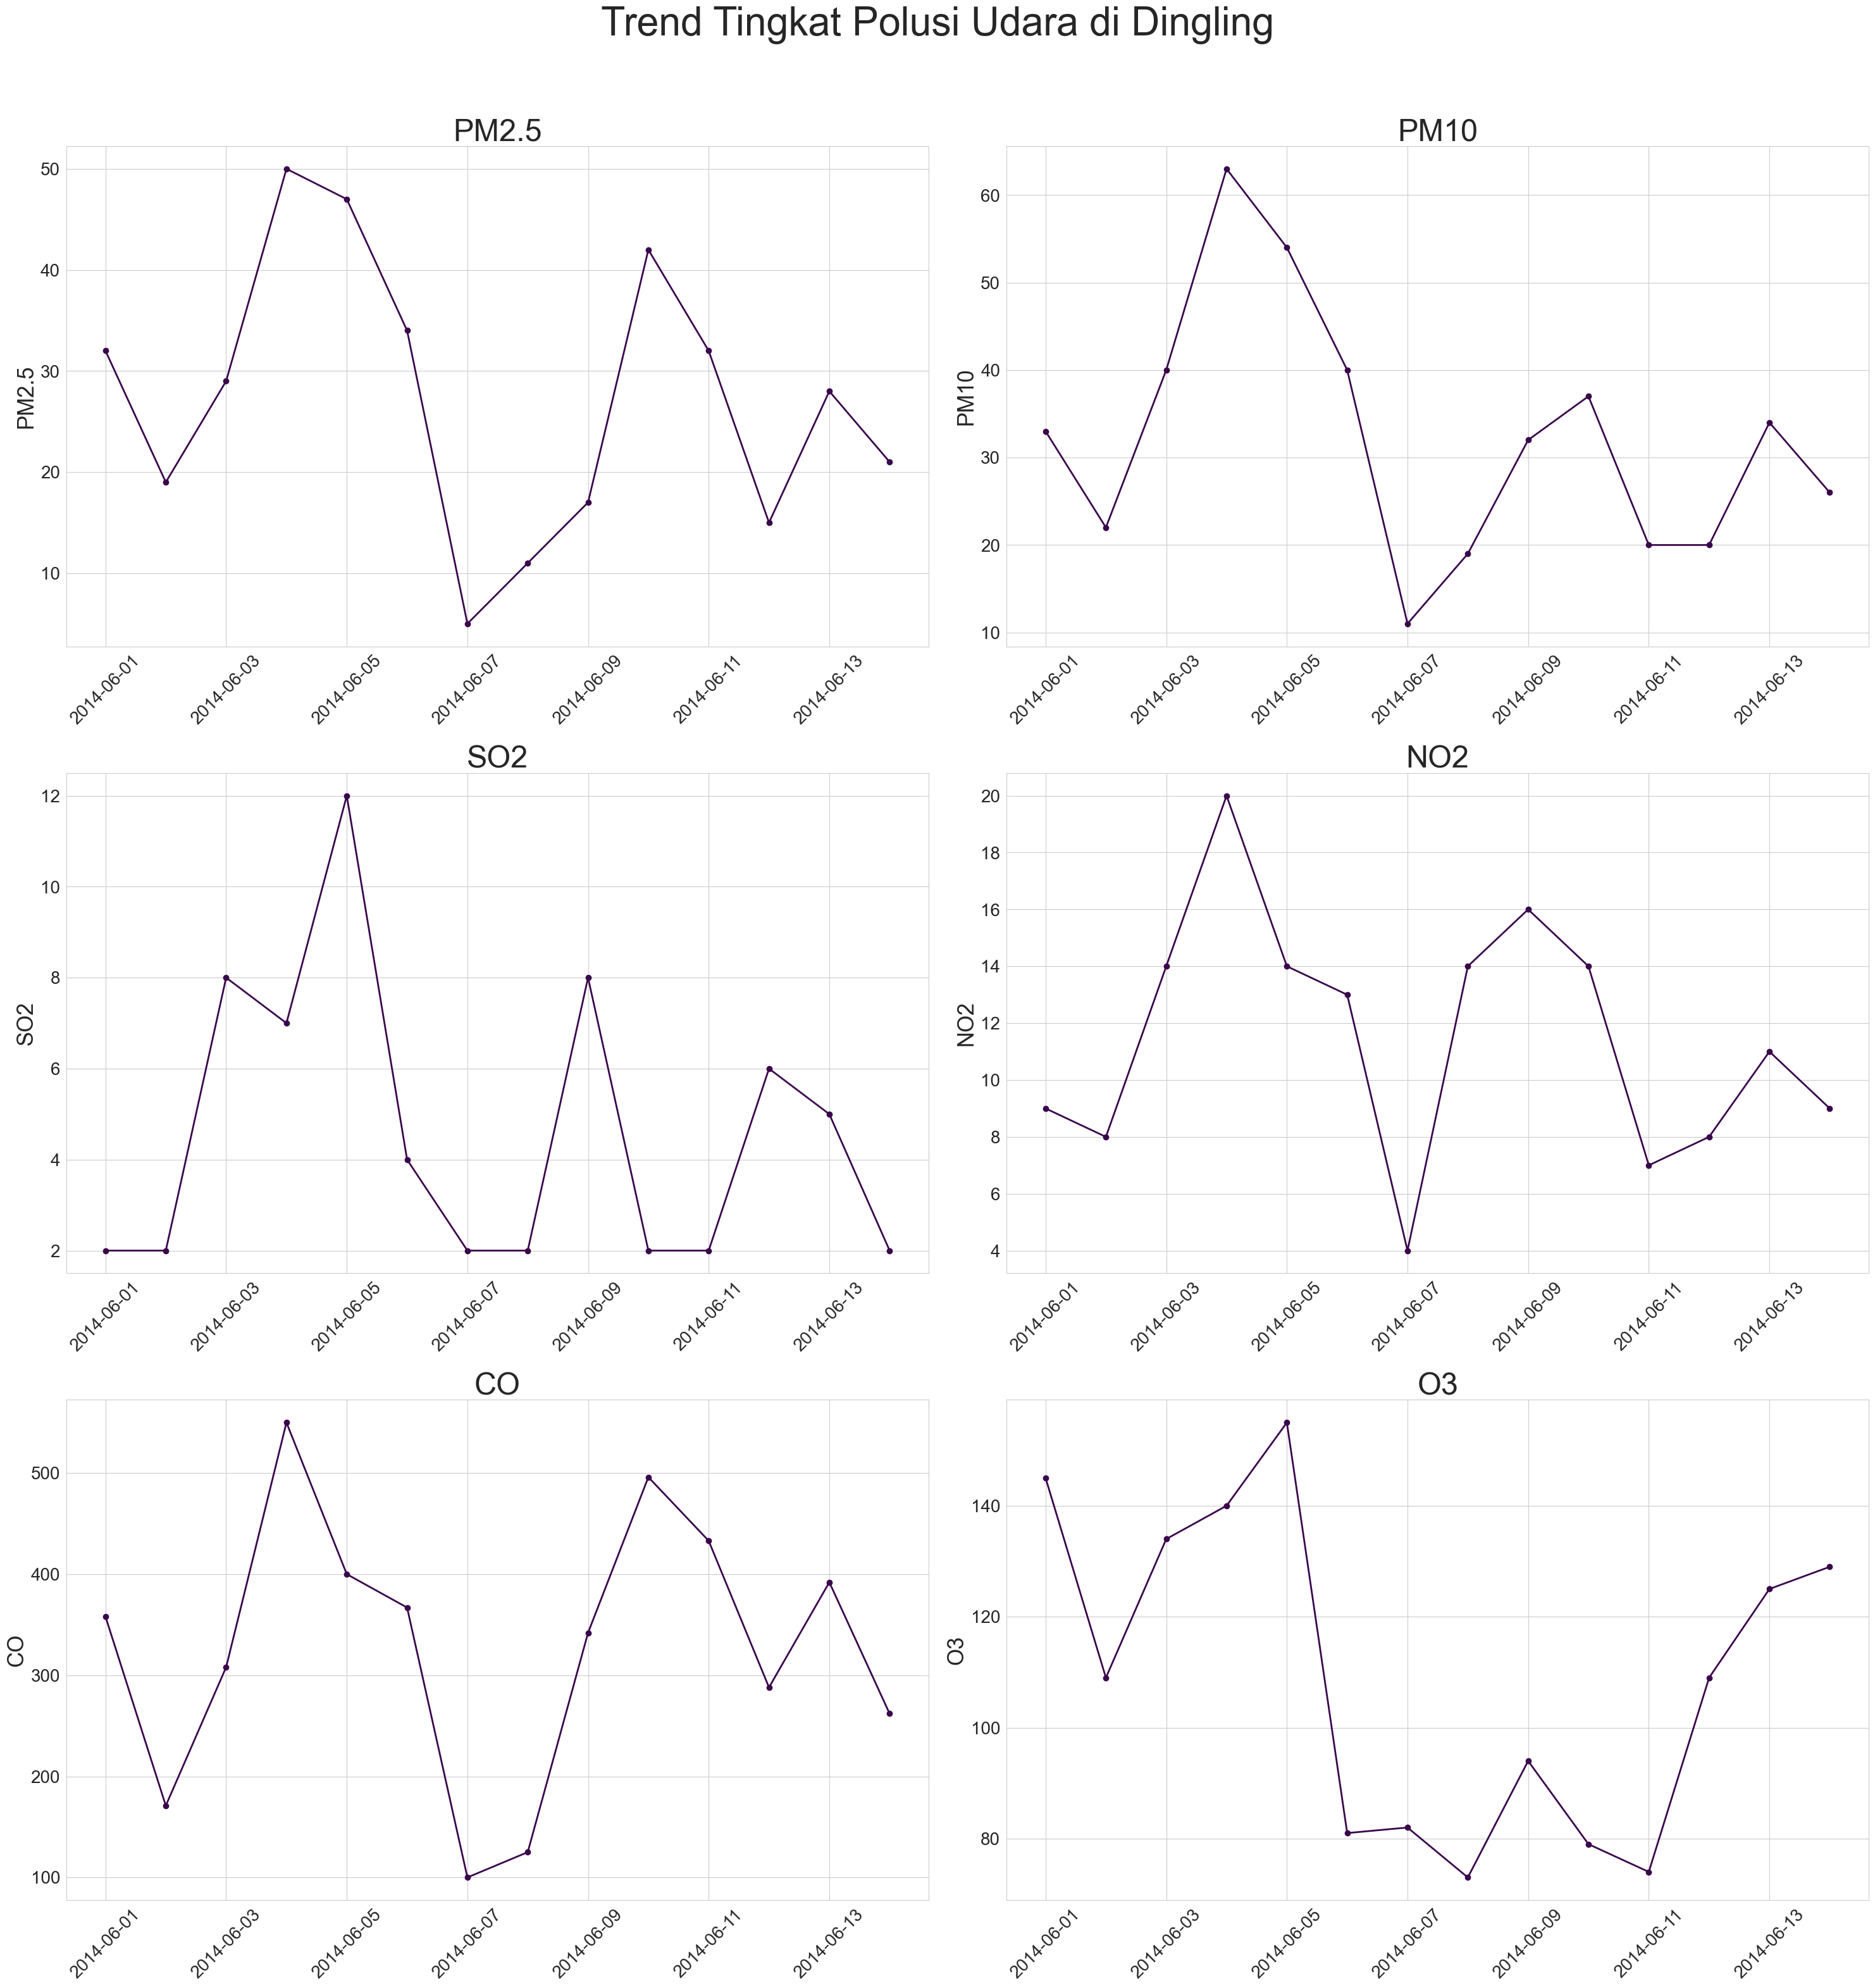

In [93]:
dingling_polusi_graph(dingling_polusi_mingguan)

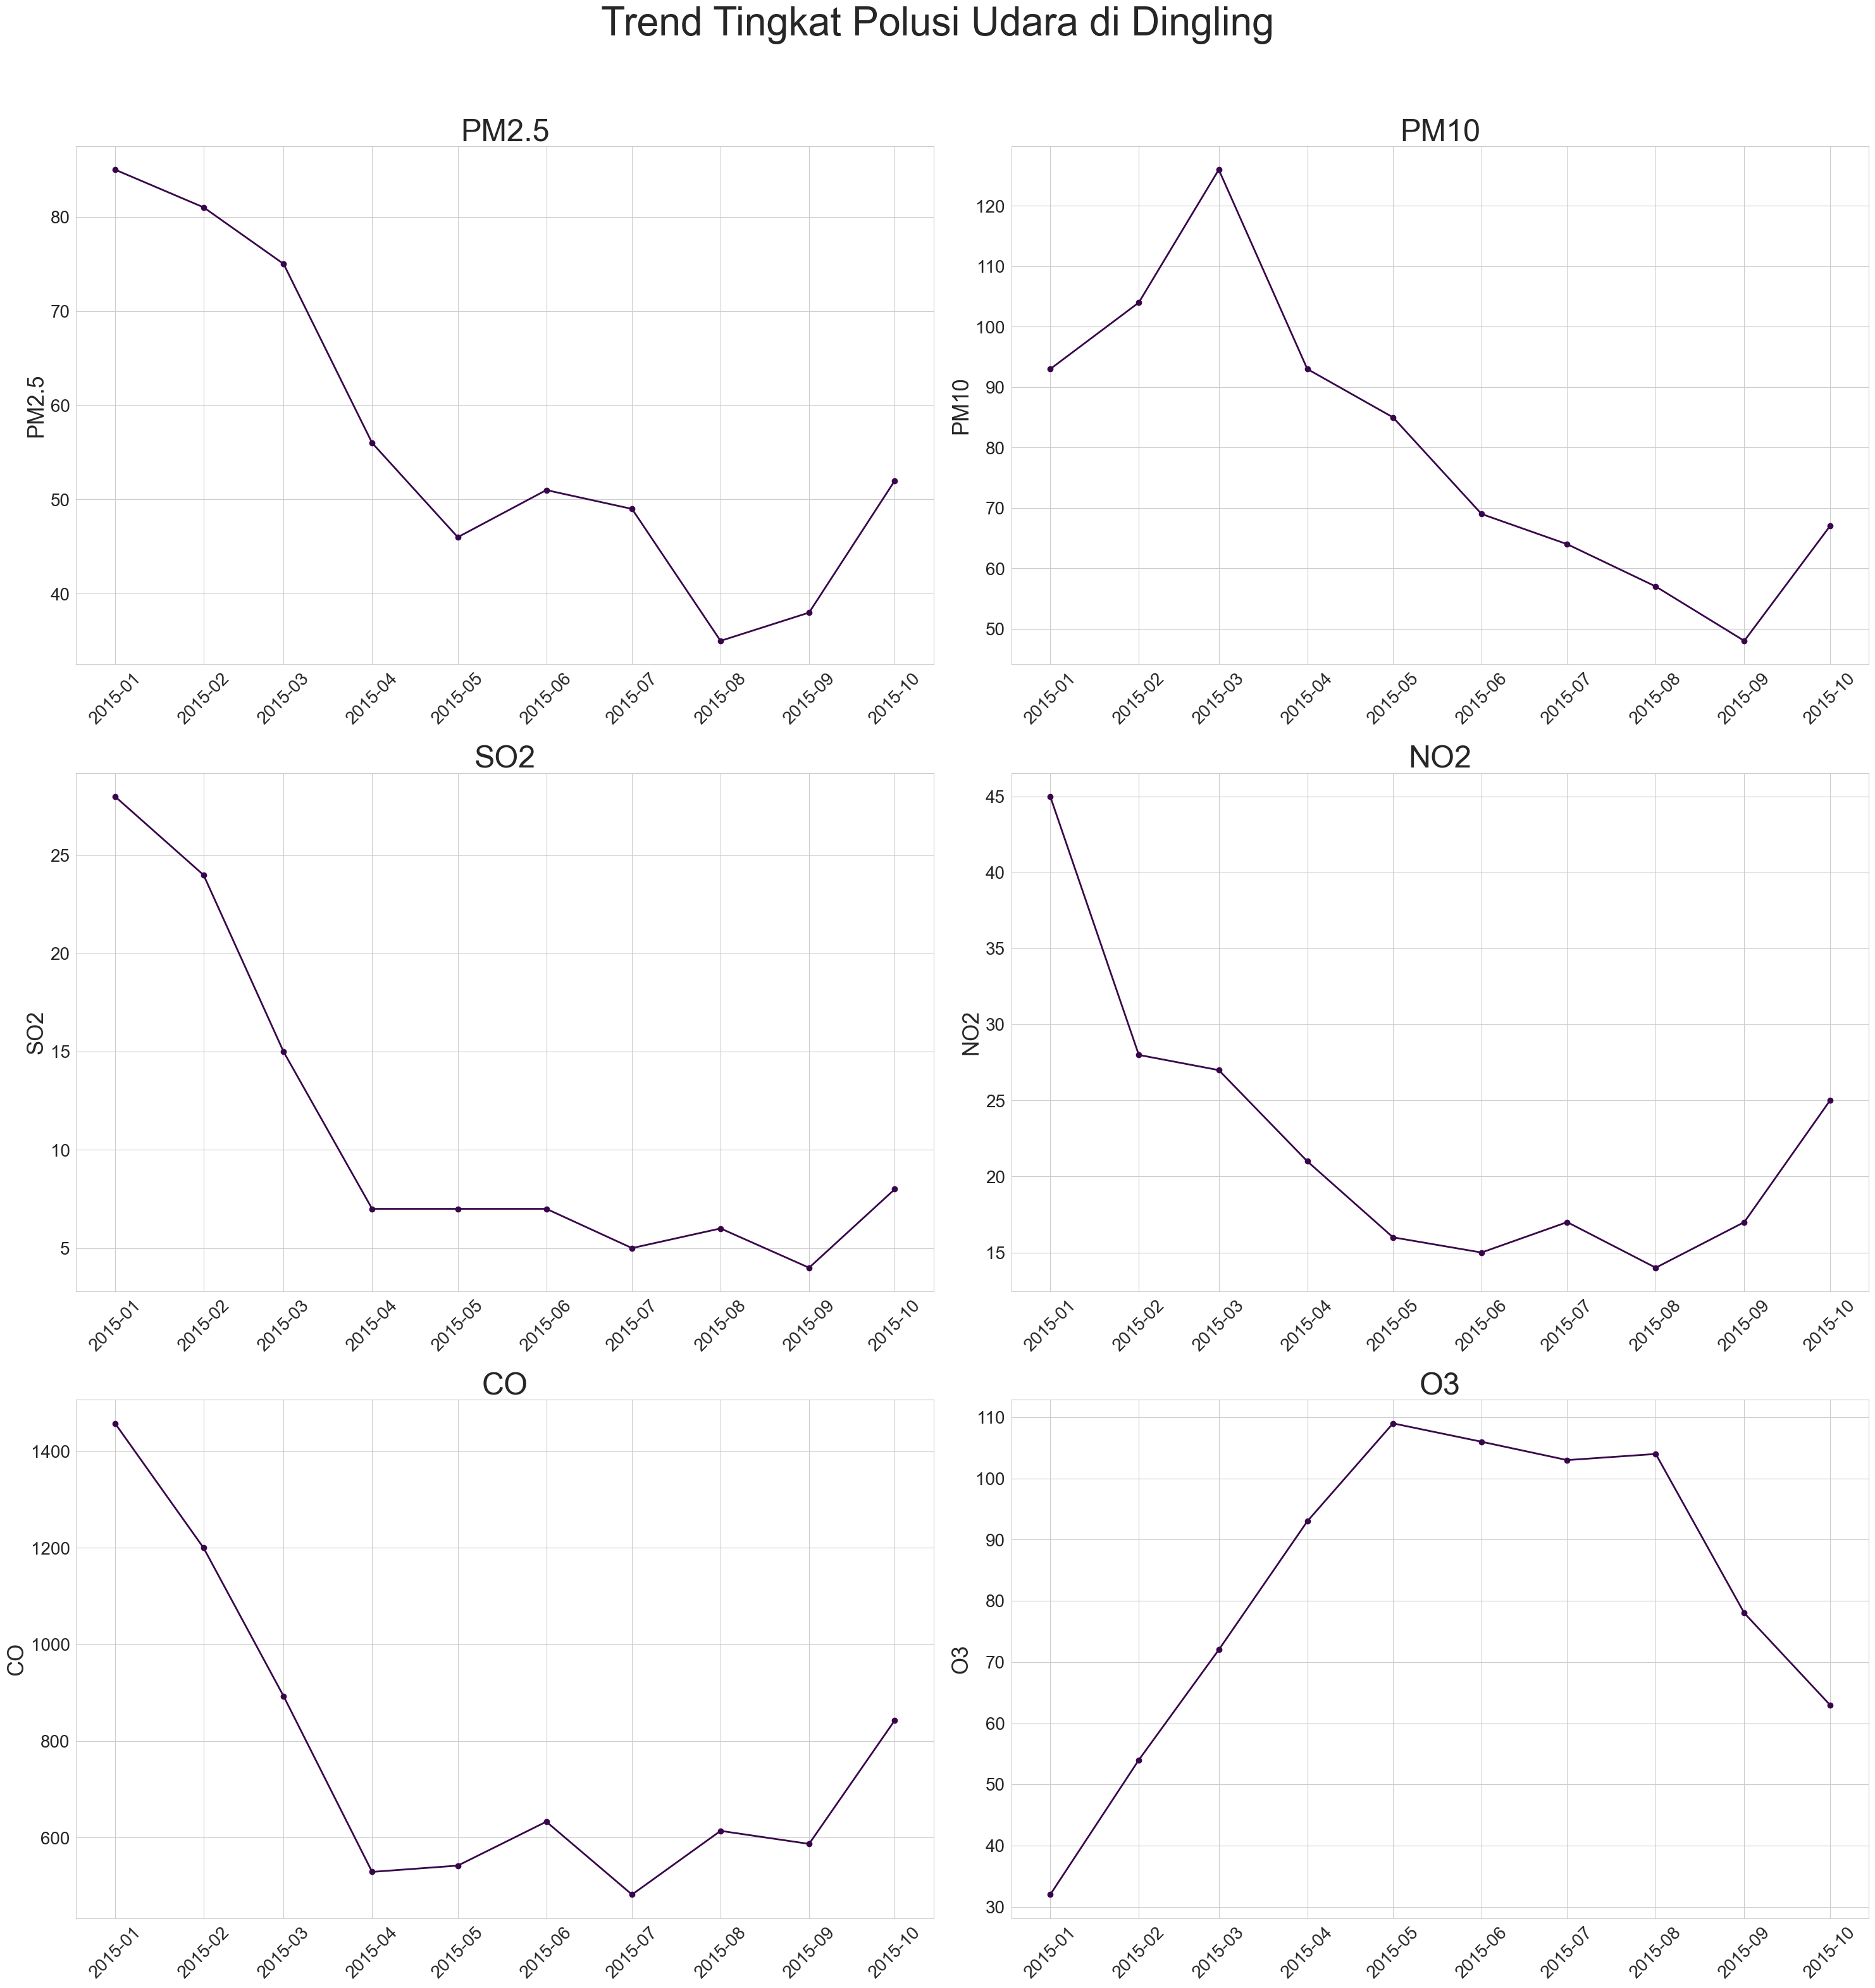

In [94]:
dingling_polusi_graph(dingling_polusi_bulanan)

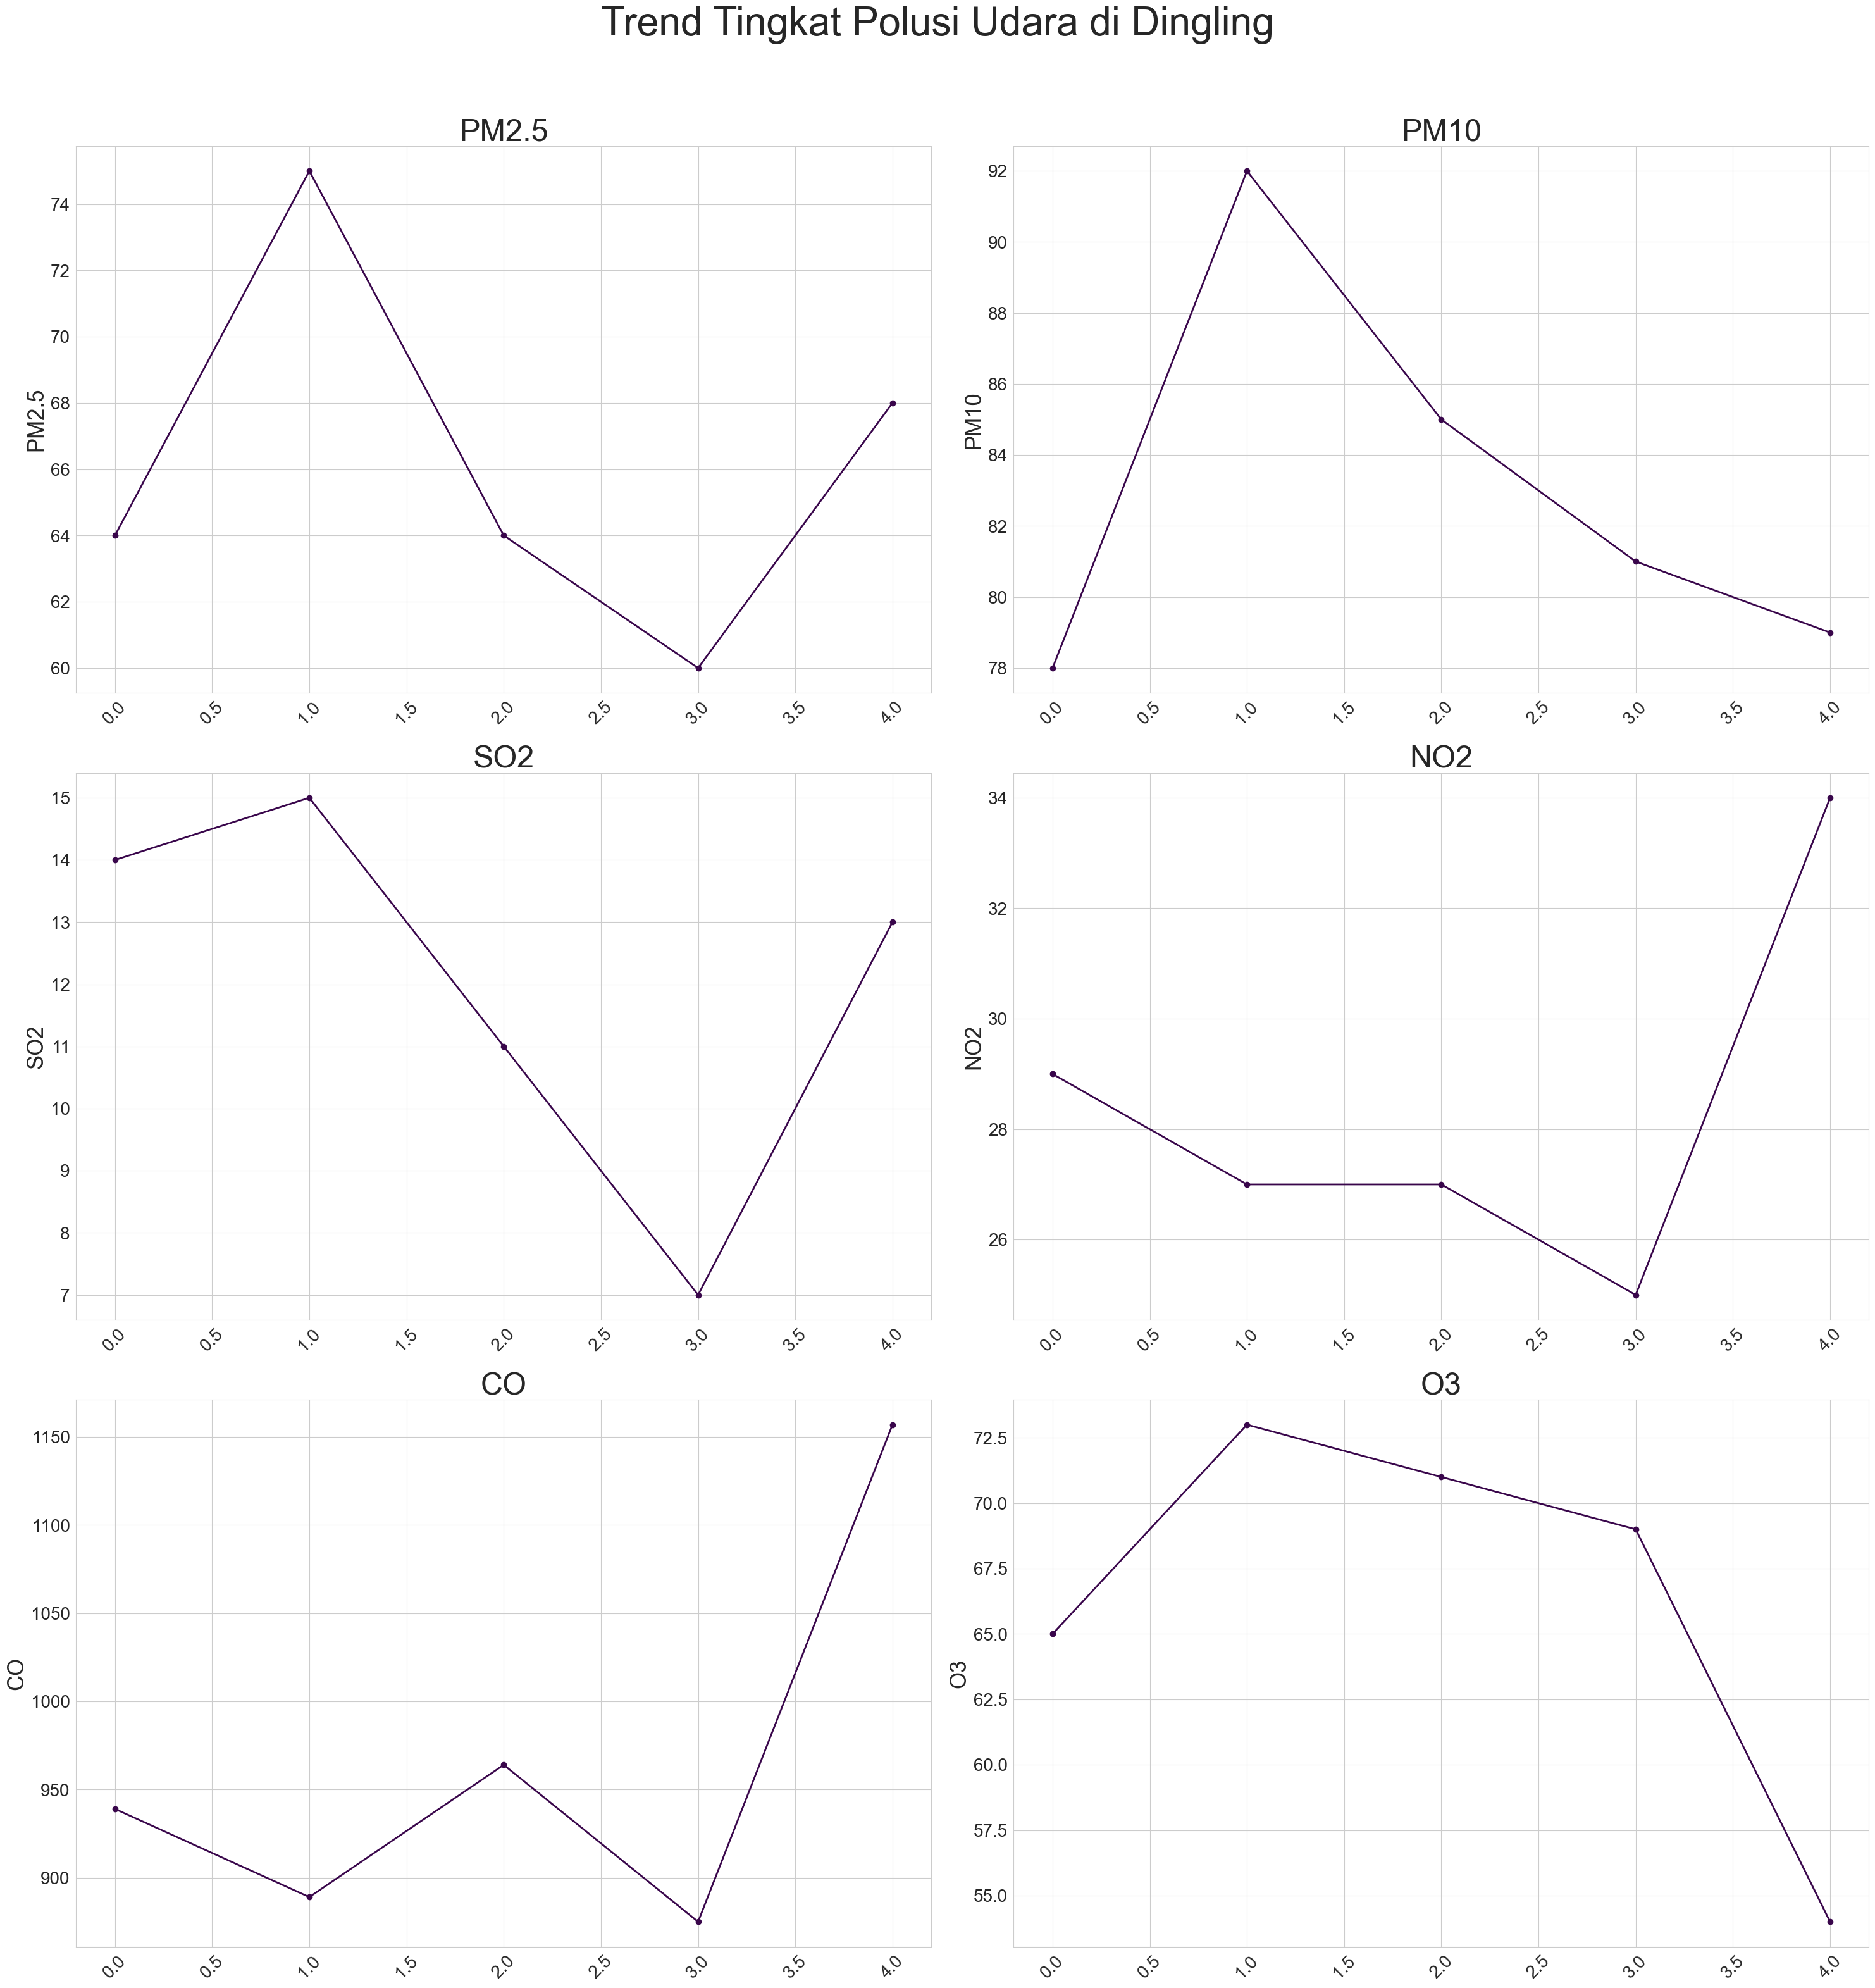

In [95]:
dingling_polusi_graph(dingling_polusi_tahunan)

Pada masing masing hasil eksplorasi data ini, akan ditampilkan apakah nilai PM2.5 dan PM10 rata rata pada rentang waktu tersebut masih termasuk sehat atau tidak berdasarkan acuan BMKG. Untuk acuan batasnya sebagai berikut

1.PM2.5:
- PM2.5 ≤ 15,5 Baik
- 15,6 ≤ PM2.5 ≤ 55,4 Sedang
- 55,5 ≤ PM2.5 ≤ 150,4 Tidak Sehat
- 150,4 ≤ PM2.5 ≤ 250,4 Sangat Tidak Sehat
- PM2.5 ≥ 250,5 Berbahaya

2.PM10:
- PM10 ≤ 50 Baik
- 51 ≤ PM10 ≤ 150 Sedang
- 151 ≤ PM10 ≤ 350 Tidak Sehat
- 351 ≤ PM10 ≤ 420 Sangat Tidak Sehat
- PM10 ≥ 421 Berbahaya

In [96]:
# Fungsi untuk mengklasifikasikan tingkat polusi
def dingling_polusi(df):
    pm25 = round(df['PM2.5'].mean(), 1)
    pm10 = round(df['PM10'].mean(), 0)
    SO2 = round(df['SO2'].mean(), 2)
    NO2 = round(df['NO2'].mean(), 2)
    CO = round(df['CO'].mean(), 2)
    O3 = round(df['O3'].mean(), 2)

    # Klasifikasi PM2.5
    if pm25 <= 15.5:
        pm25_status = "BAIK"
    elif 15.6 <= pm25 <= 55.4:
        pm25_status = "SEDANG"
    elif 55.5 <= pm25 <= 150.4:
        pm25_status = "TIDAK SEHAT"
    elif 150.5 <= pm25 <= 250.4:
        pm25_status = "SANGAT TIDAK SEHAT"
    else:
        pm25_status = "BERBAHAYA"

    # Klasifikasi PM10
    if pm10 <= 50:
        pm10_status = "BAIK"
    elif 51 <= pm10 <= 150:
        pm10_status = "SEDANG"
    elif 151 <= pm10 <= 350:
        pm10_status = "TIDAK SEHAT"
    elif 351 <= pm10 <= 420:
        pm10_status = "SANGAT TIDAK SEHAT"
    else:
        pm10_status = "BERBAHAYA"


In [97]:
print("Klasifikasi tingkat polusi pada jam:")
dingling_polusi(dingling_polusi_harian)

Klasifikasi tingkat polusi pada jam:


In [98]:
print("\nKlasifikasi tingkat polusi pada mingguan:")
dingling_polusi(dingling_polusi_mingguan)


Klasifikasi tingkat polusi pada mingguan:


In [99]:
print("\nKlasifikasi tingkat polusi pada bulan:")
dingling_polusi(dingling_polusi_bulanan)


Klasifikasi tingkat polusi pada bulan:


In [100]:
print("\nKlasifikasi tingkat polusi pada tahun:")
dingling_polusi(dingling_polusi_tahunan)


Klasifikasi tingkat polusi pada tahun:


### Pertanyaan 2: Bagaimana tren suhu dan tekanan udara di dingling setiap bulan dari tahun 2013 hingga 2017?

In [101]:
# Fungsi untuk menampilkan grafik tren suhu dan tekanan udara
def air_parameters_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    ax[0].plot(df.index, df['TEMP'], marker='o', linewidth=2, color="#39064B")
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0].set_ylabel("Suhu (°C)", fontsize=25)
    ax[0].set_title("Suhu", loc="center", fontsize=35)

    ax[1].plot(df.index, df['PRES'], marker='o', linewidth=2, color="#39064B")
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1].set_ylabel("Tekanan (hPa)", fontsize=25)
    ax[1].set_title("Tekanan", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Dingling", fontsize=45, y=1.05)
    plt.show()

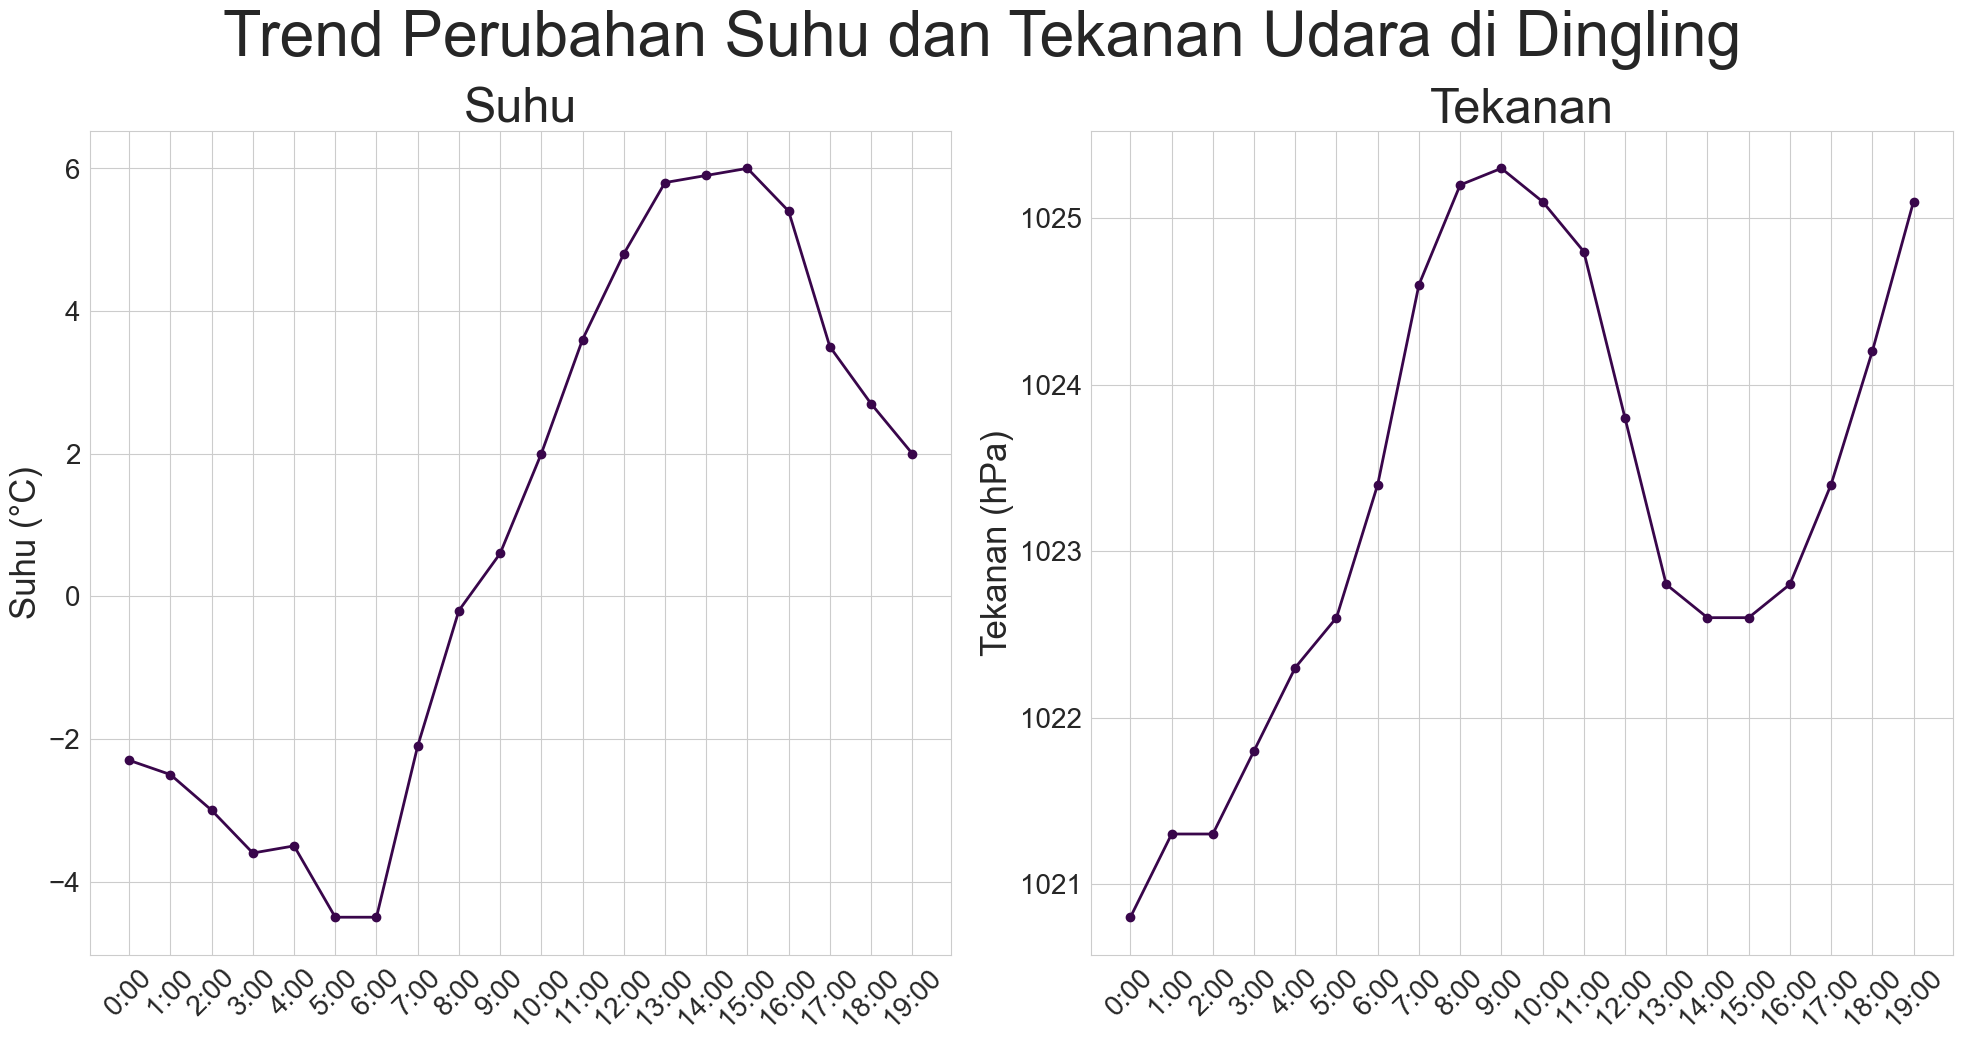

In [102]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03-01 pukul 00.00-19.00
air_parameters_graph(dingling_parameters_harian.head(20))

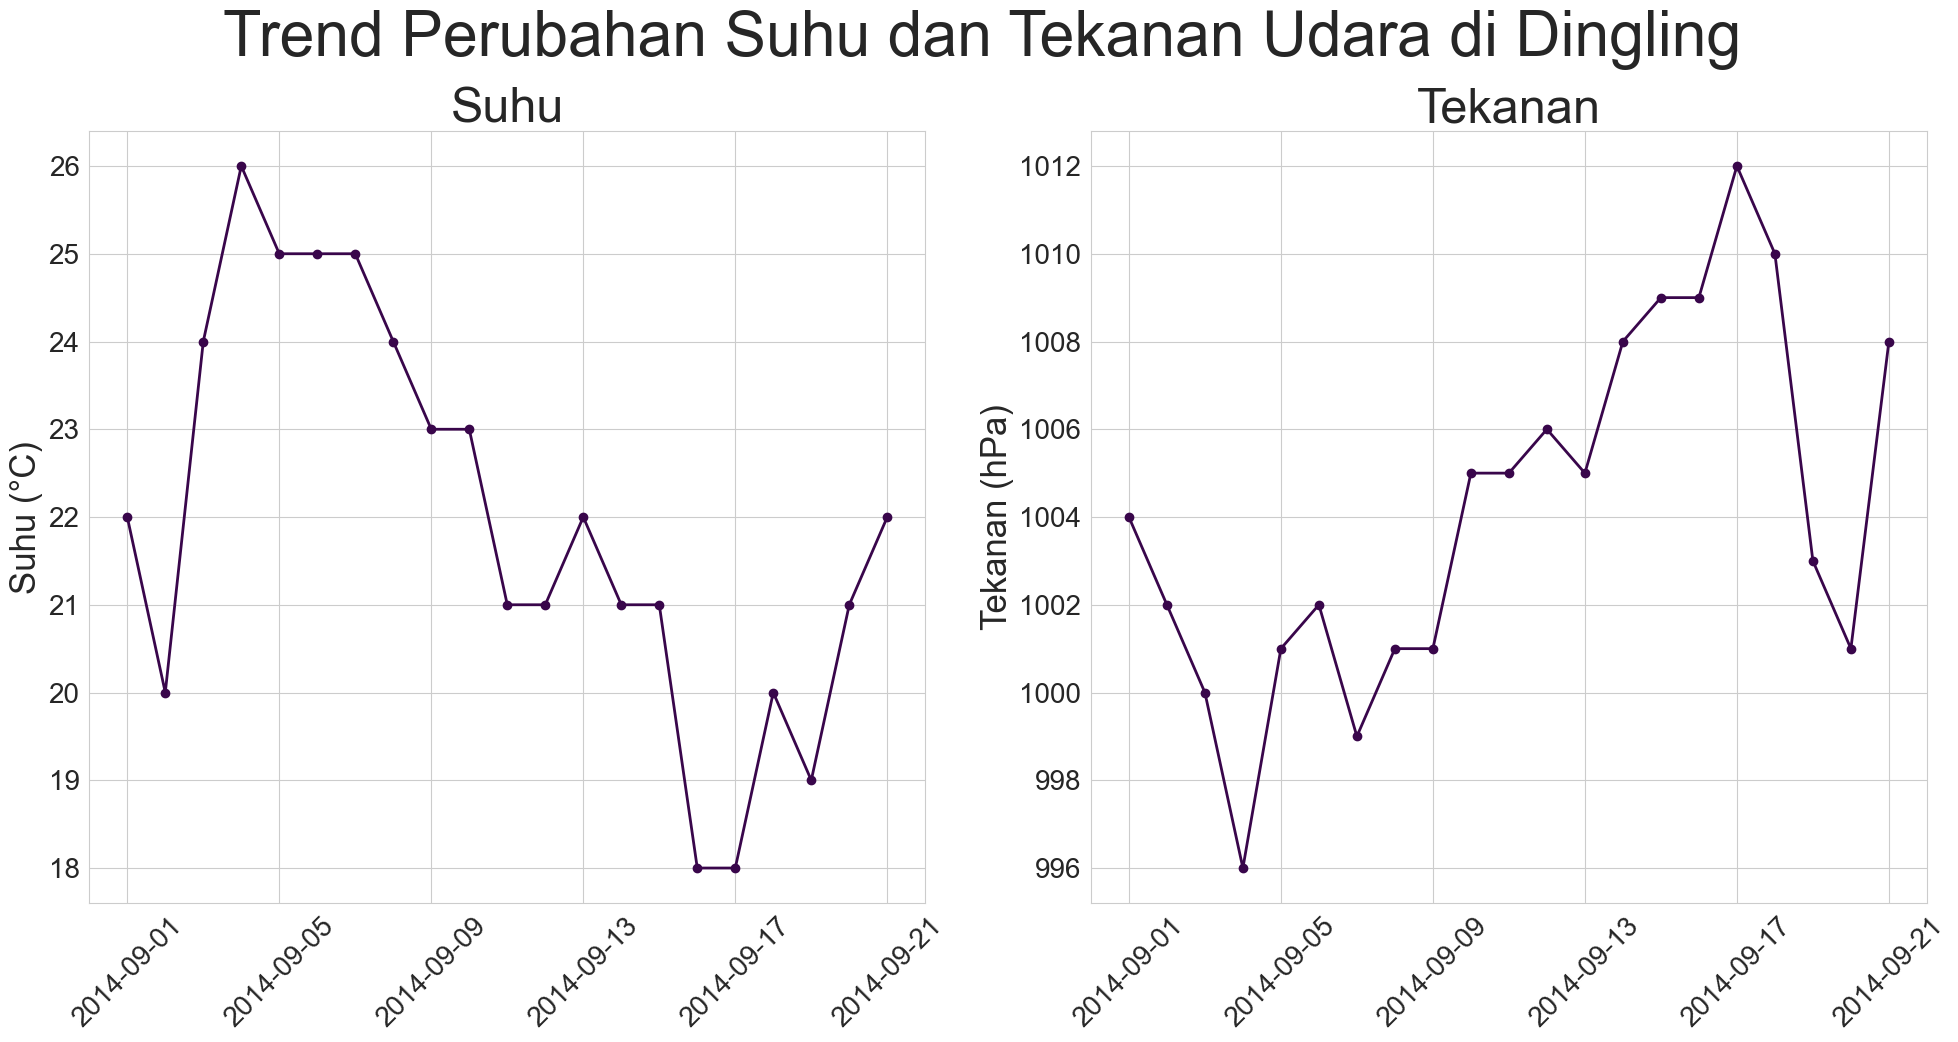

In [103]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2014-09-01 sampai 2014-09-21
air_parameters_graph(dingling_parameters_mingguan.head(22))

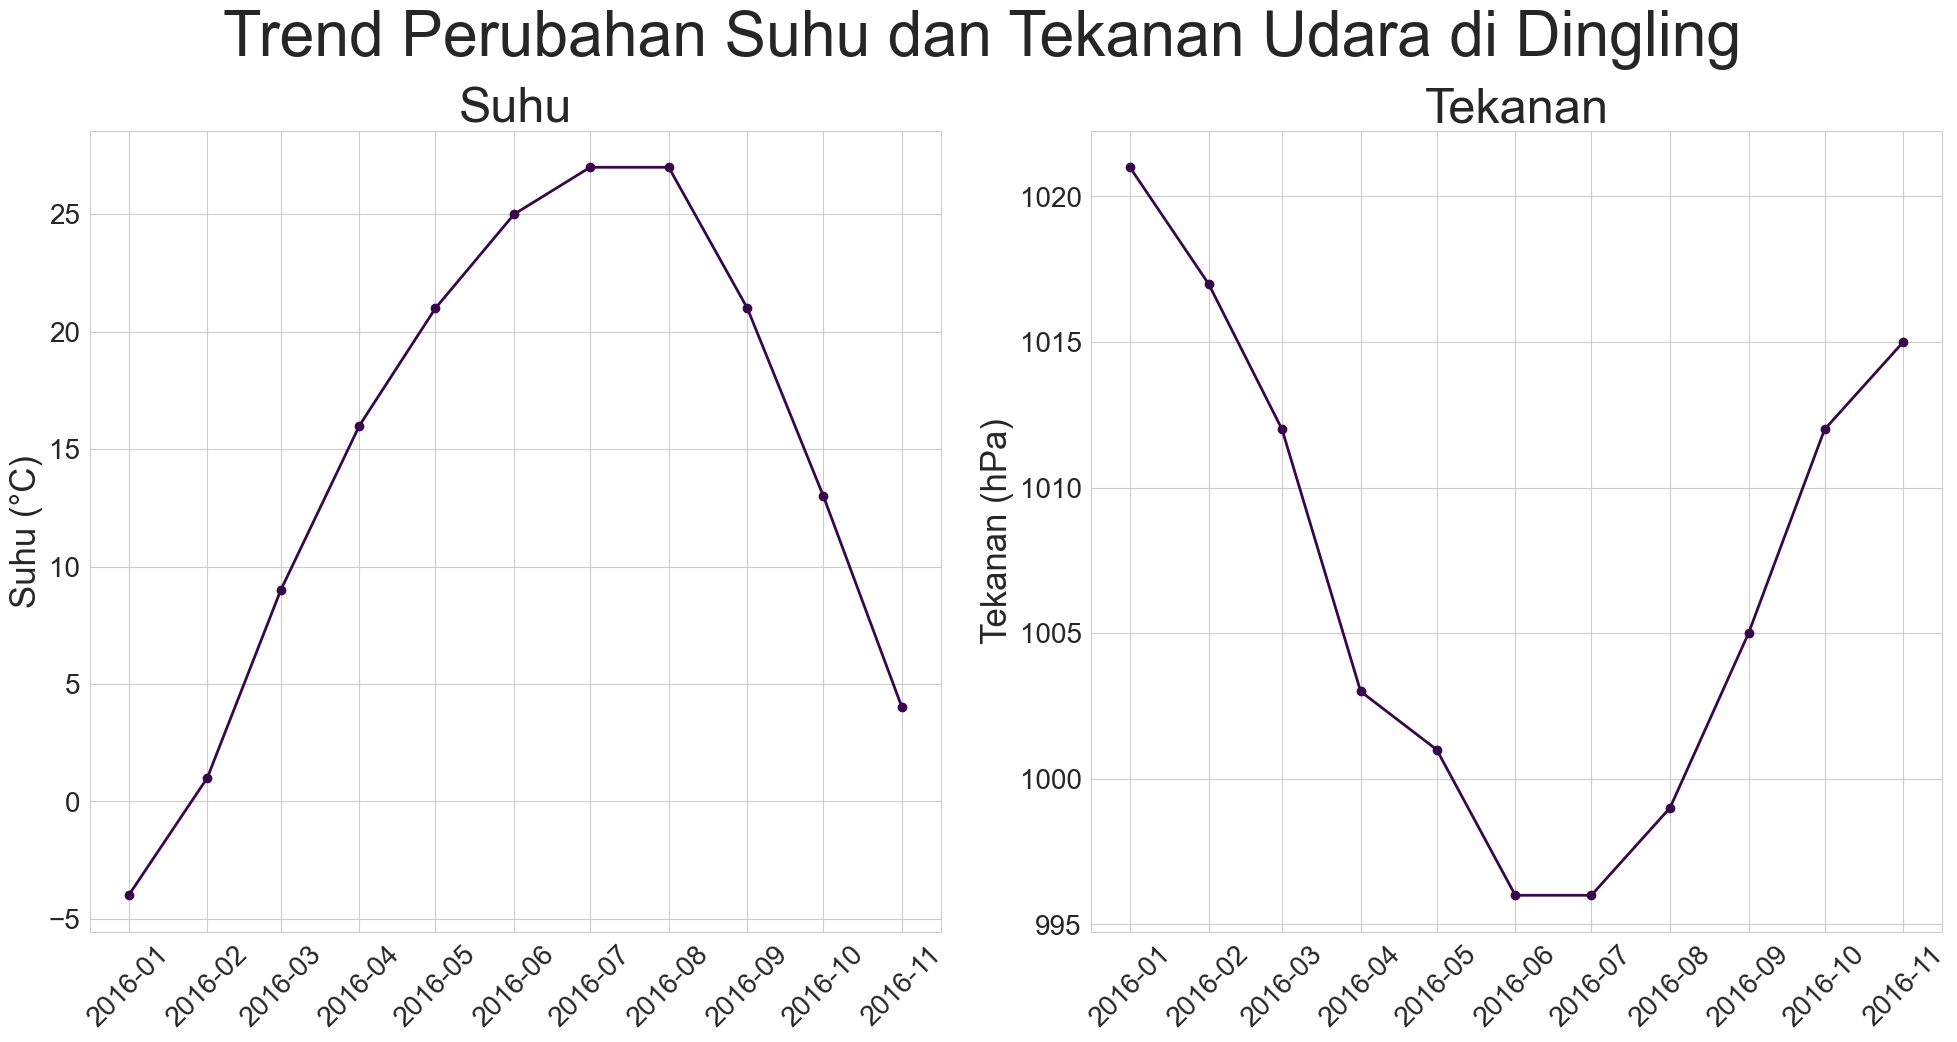

In [104]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2016-01 sampai 2016-11
air_parameters_graph(dingling_parameters_bulanan.head(12))


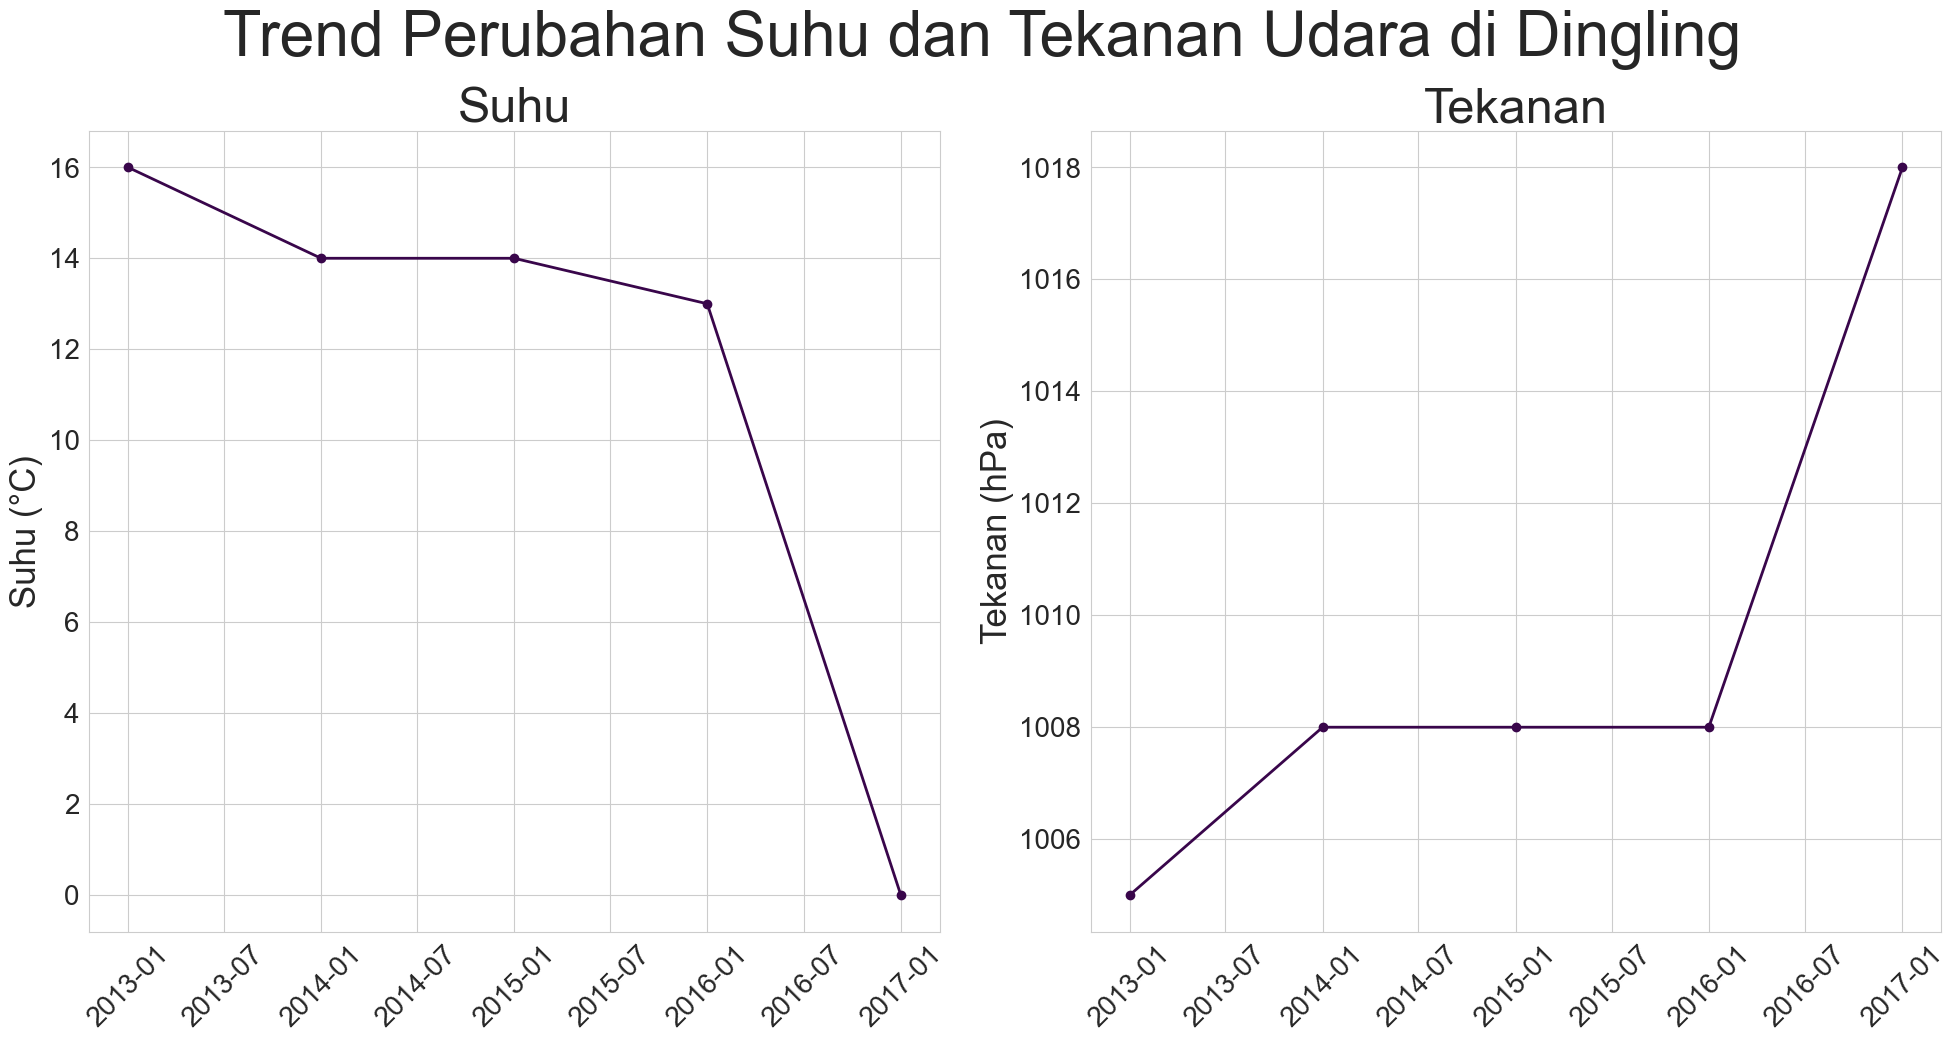

In [105]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013 sampai 2017
air_parameters_graph(dingling_parameters_tahunan)


In [106]:
# Fungsi untuk menampilkan rata-rata suhu dan tekanan udara
def airparameters_show(df):
    suhu = round(df['TEMP'].mean(), 2)
    tekanan = round(df['PRES'].mean(), 2)

    print("Rata-rata suhu:", str(suhu) + " °C")
    print("Rata-rata tekanan:", str(tekanan) + " hPa")

In [107]:
# Rata-rata suhu dan tekanan udara pada 2013-03-01 pukul 00.00-19.00
print("2013-03-01 pukul 00.00-19.00 \n")
airparameters_show(dingling_parameters_harian.head(20))

2013-03-01 pukul 00.00-19.00 

Rata-rata suhu: 0.8 °C
Rata-rata tekanan: 1023.29 hPa


In [108]:
# Rata-rata suhu dan tekanan udara pada 2014-09-01 sampai 2014-09-21
print("2014-09-01 sampai 2014-09-21 \n")
airparameters_show(dingling_parameters_mingguan.head(22))

2014-09-01 sampai 2014-09-21 

Rata-rata suhu: 21.95 °C
Rata-rata tekanan: 1004.14 hPa


In [109]:
# Rata-rata suhu dan tekanan udara pada 2016-01 sampai 2016-11
print("2016-01 sampai 2016-11 \n")
airparameters_show(dingling_parameters_bulanan.head(12))

2016-01 sampai 2016-11 

Rata-rata suhu: 14.55 °C
Rata-rata tekanan: 1007.0 hPa


In [110]:
# Rata-rata suhu dan tekanan udara pada 2013 sampai 2017
print("2013 sampai 2017 \n")
airparameters_show(dingling_parameters_tahunan)

2013 sampai 2017 

Rata-rata suhu: 11.4 °C
Rata-rata tekanan: 1009.4 hPa


### Pertanyaan 3: Bagaimana hubungan antara konsentrasi PM2.5 dan PM10 dengan suhu dan tekanan udara di dingling?

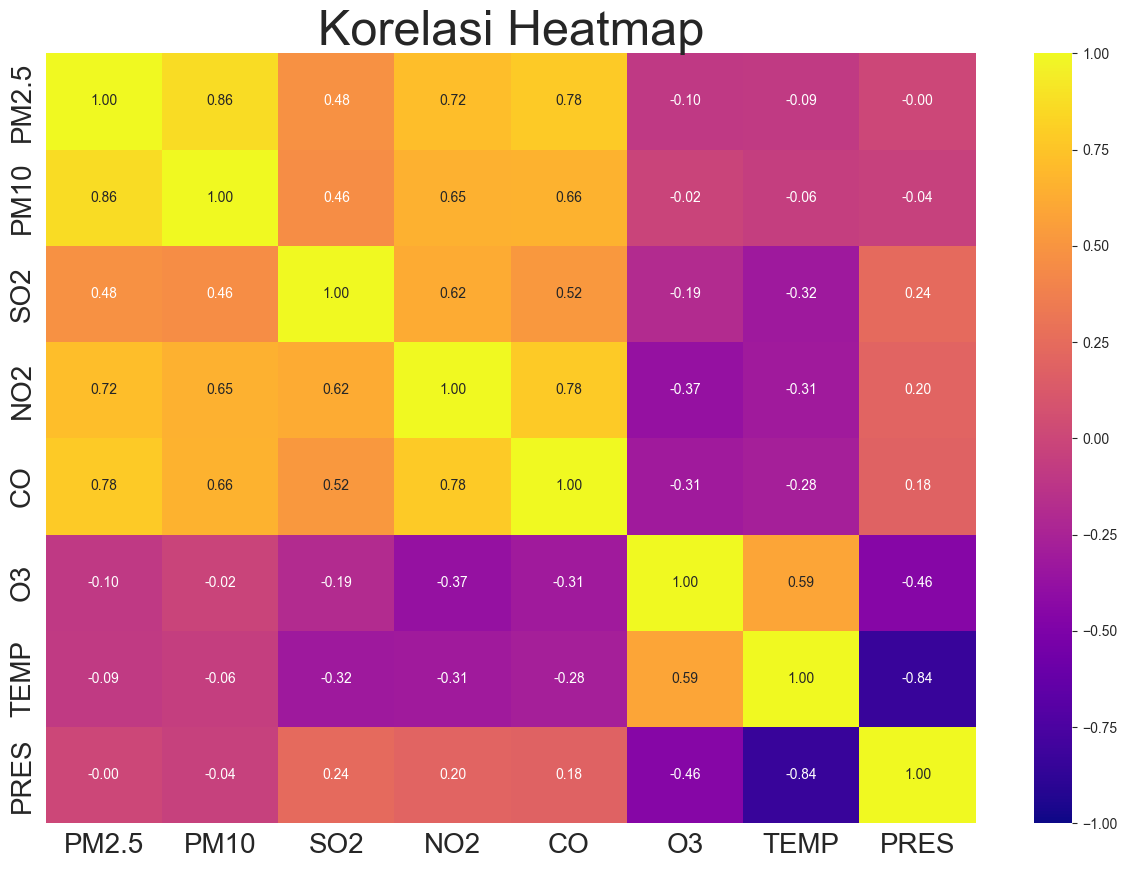

In [111]:
# Tampilan grafik korelasi heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(korelasi, vmax=1, vmin=-1, center=0, cmap="plasma", annot=True, fmt=".2f")
ax.tick_params(labelsize=20)
ax.set_title("Korelasi Heatmap", loc="center", fontsize=35)

plt.show()


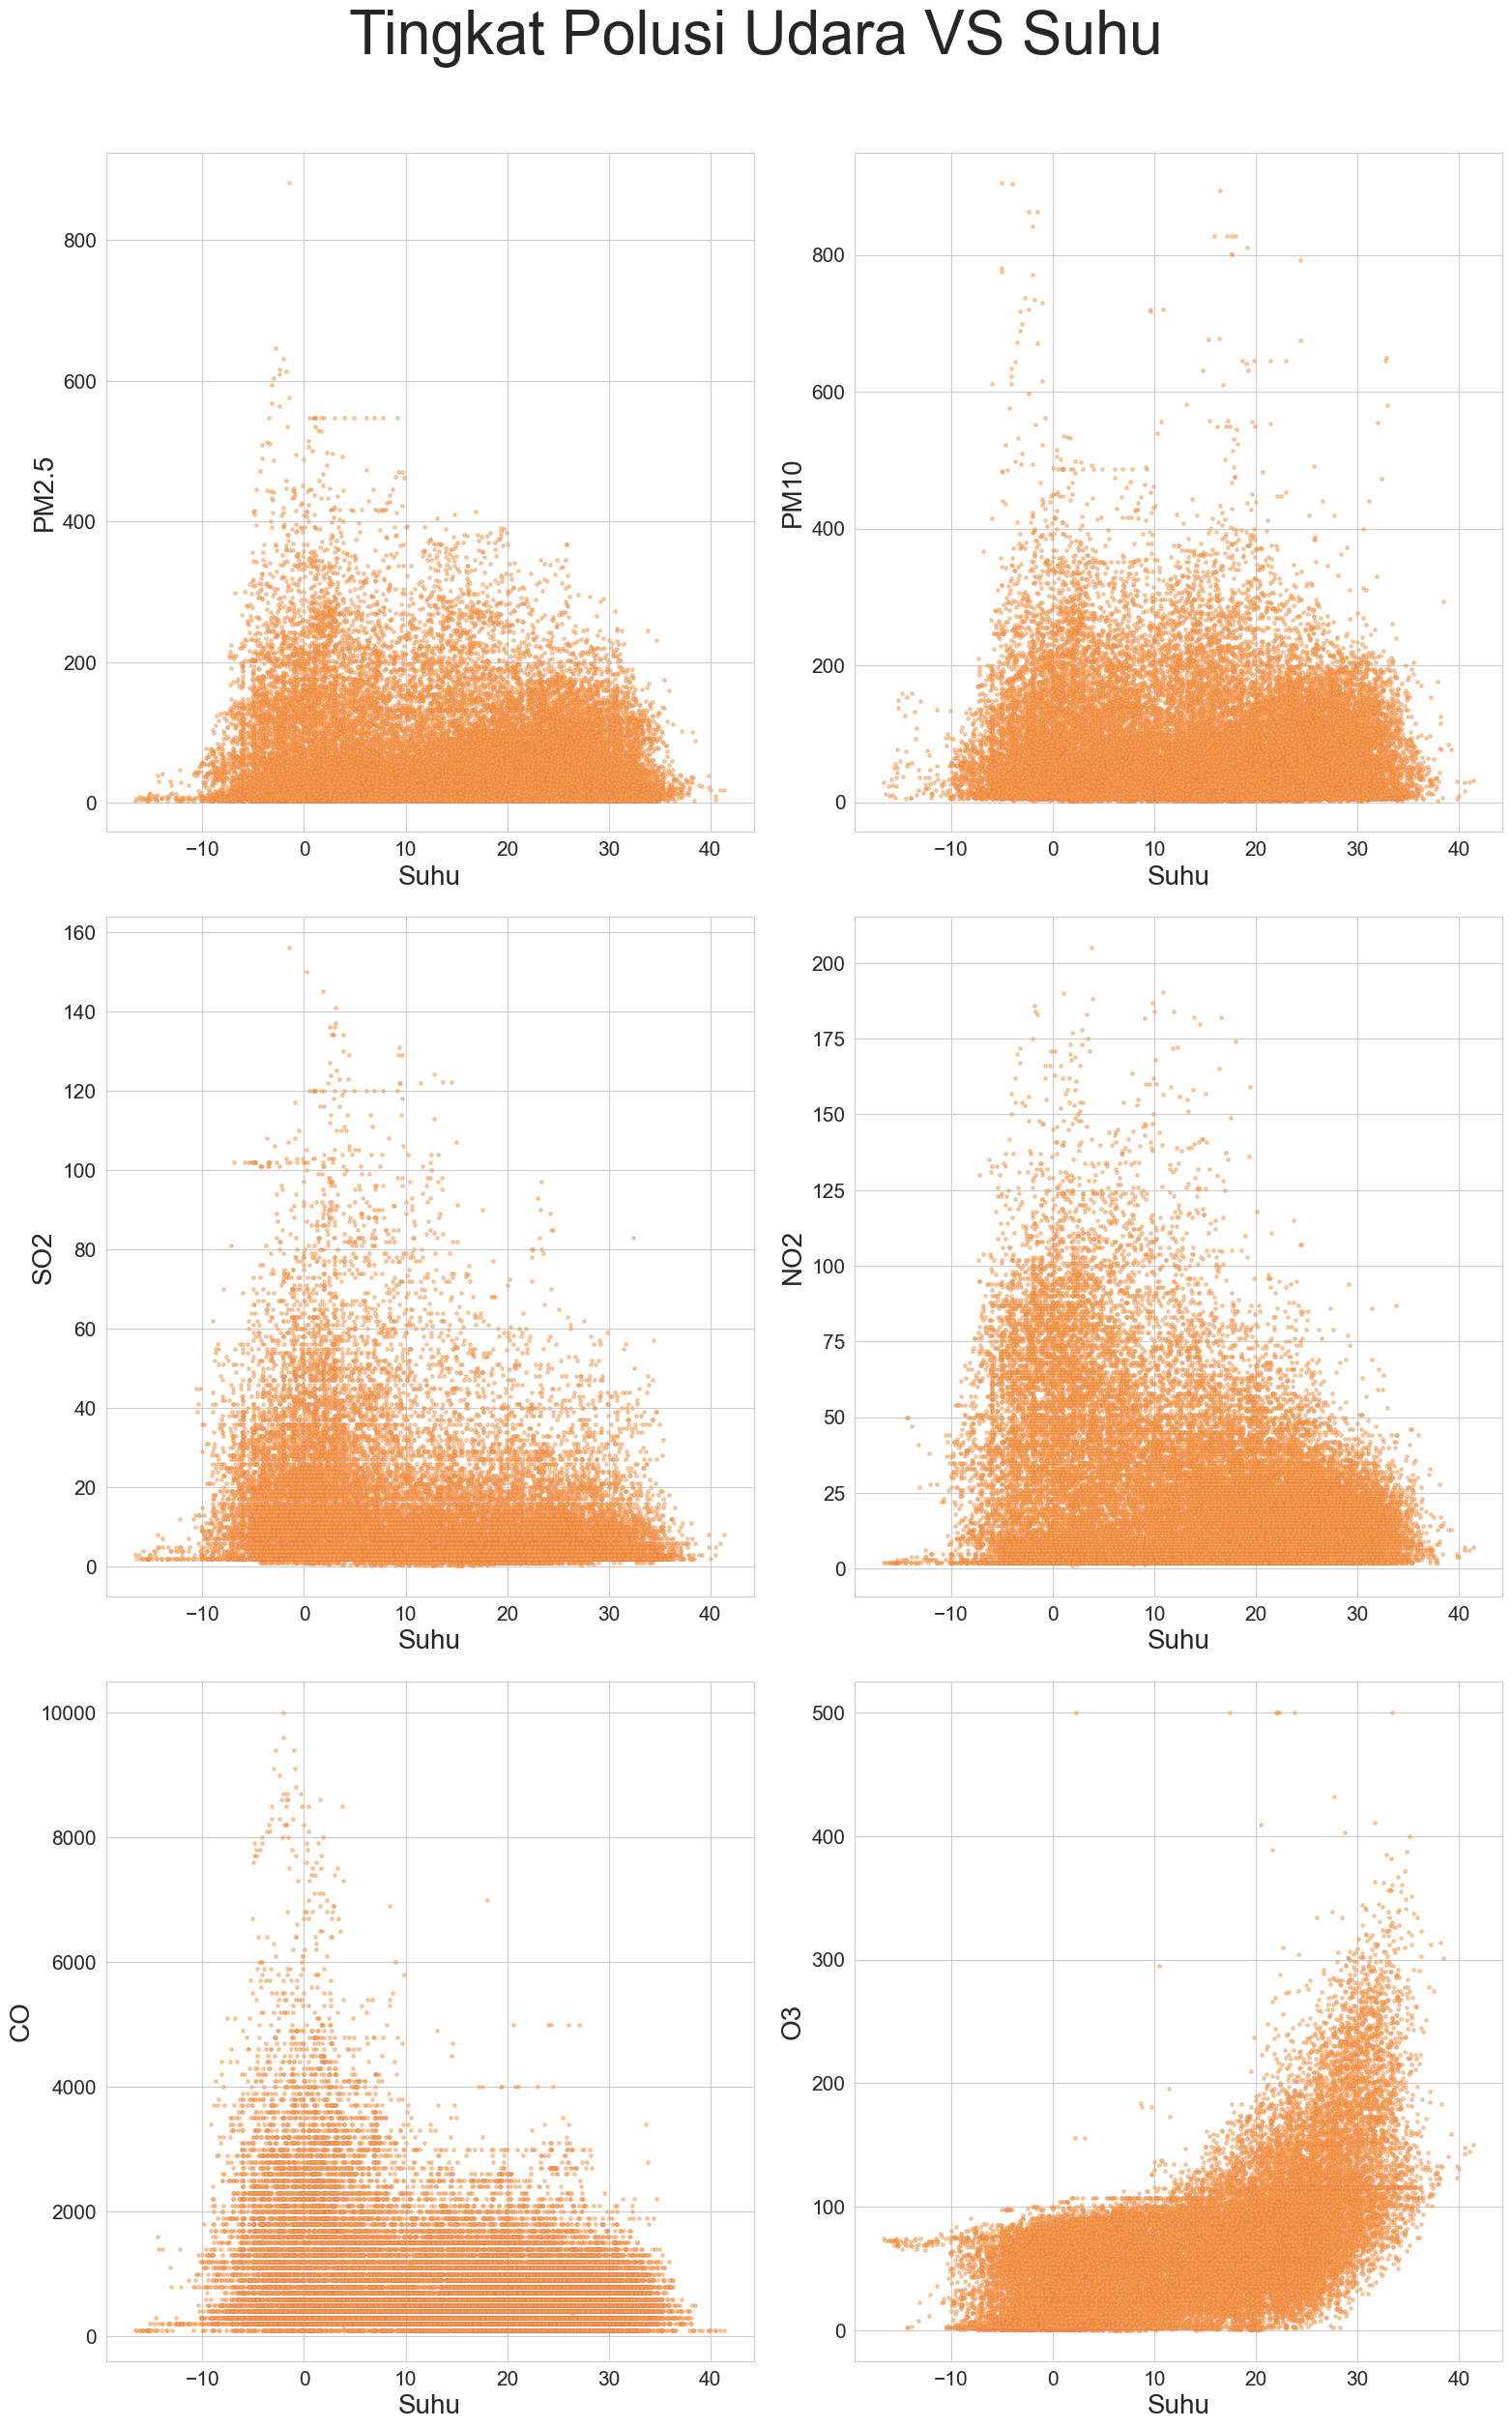

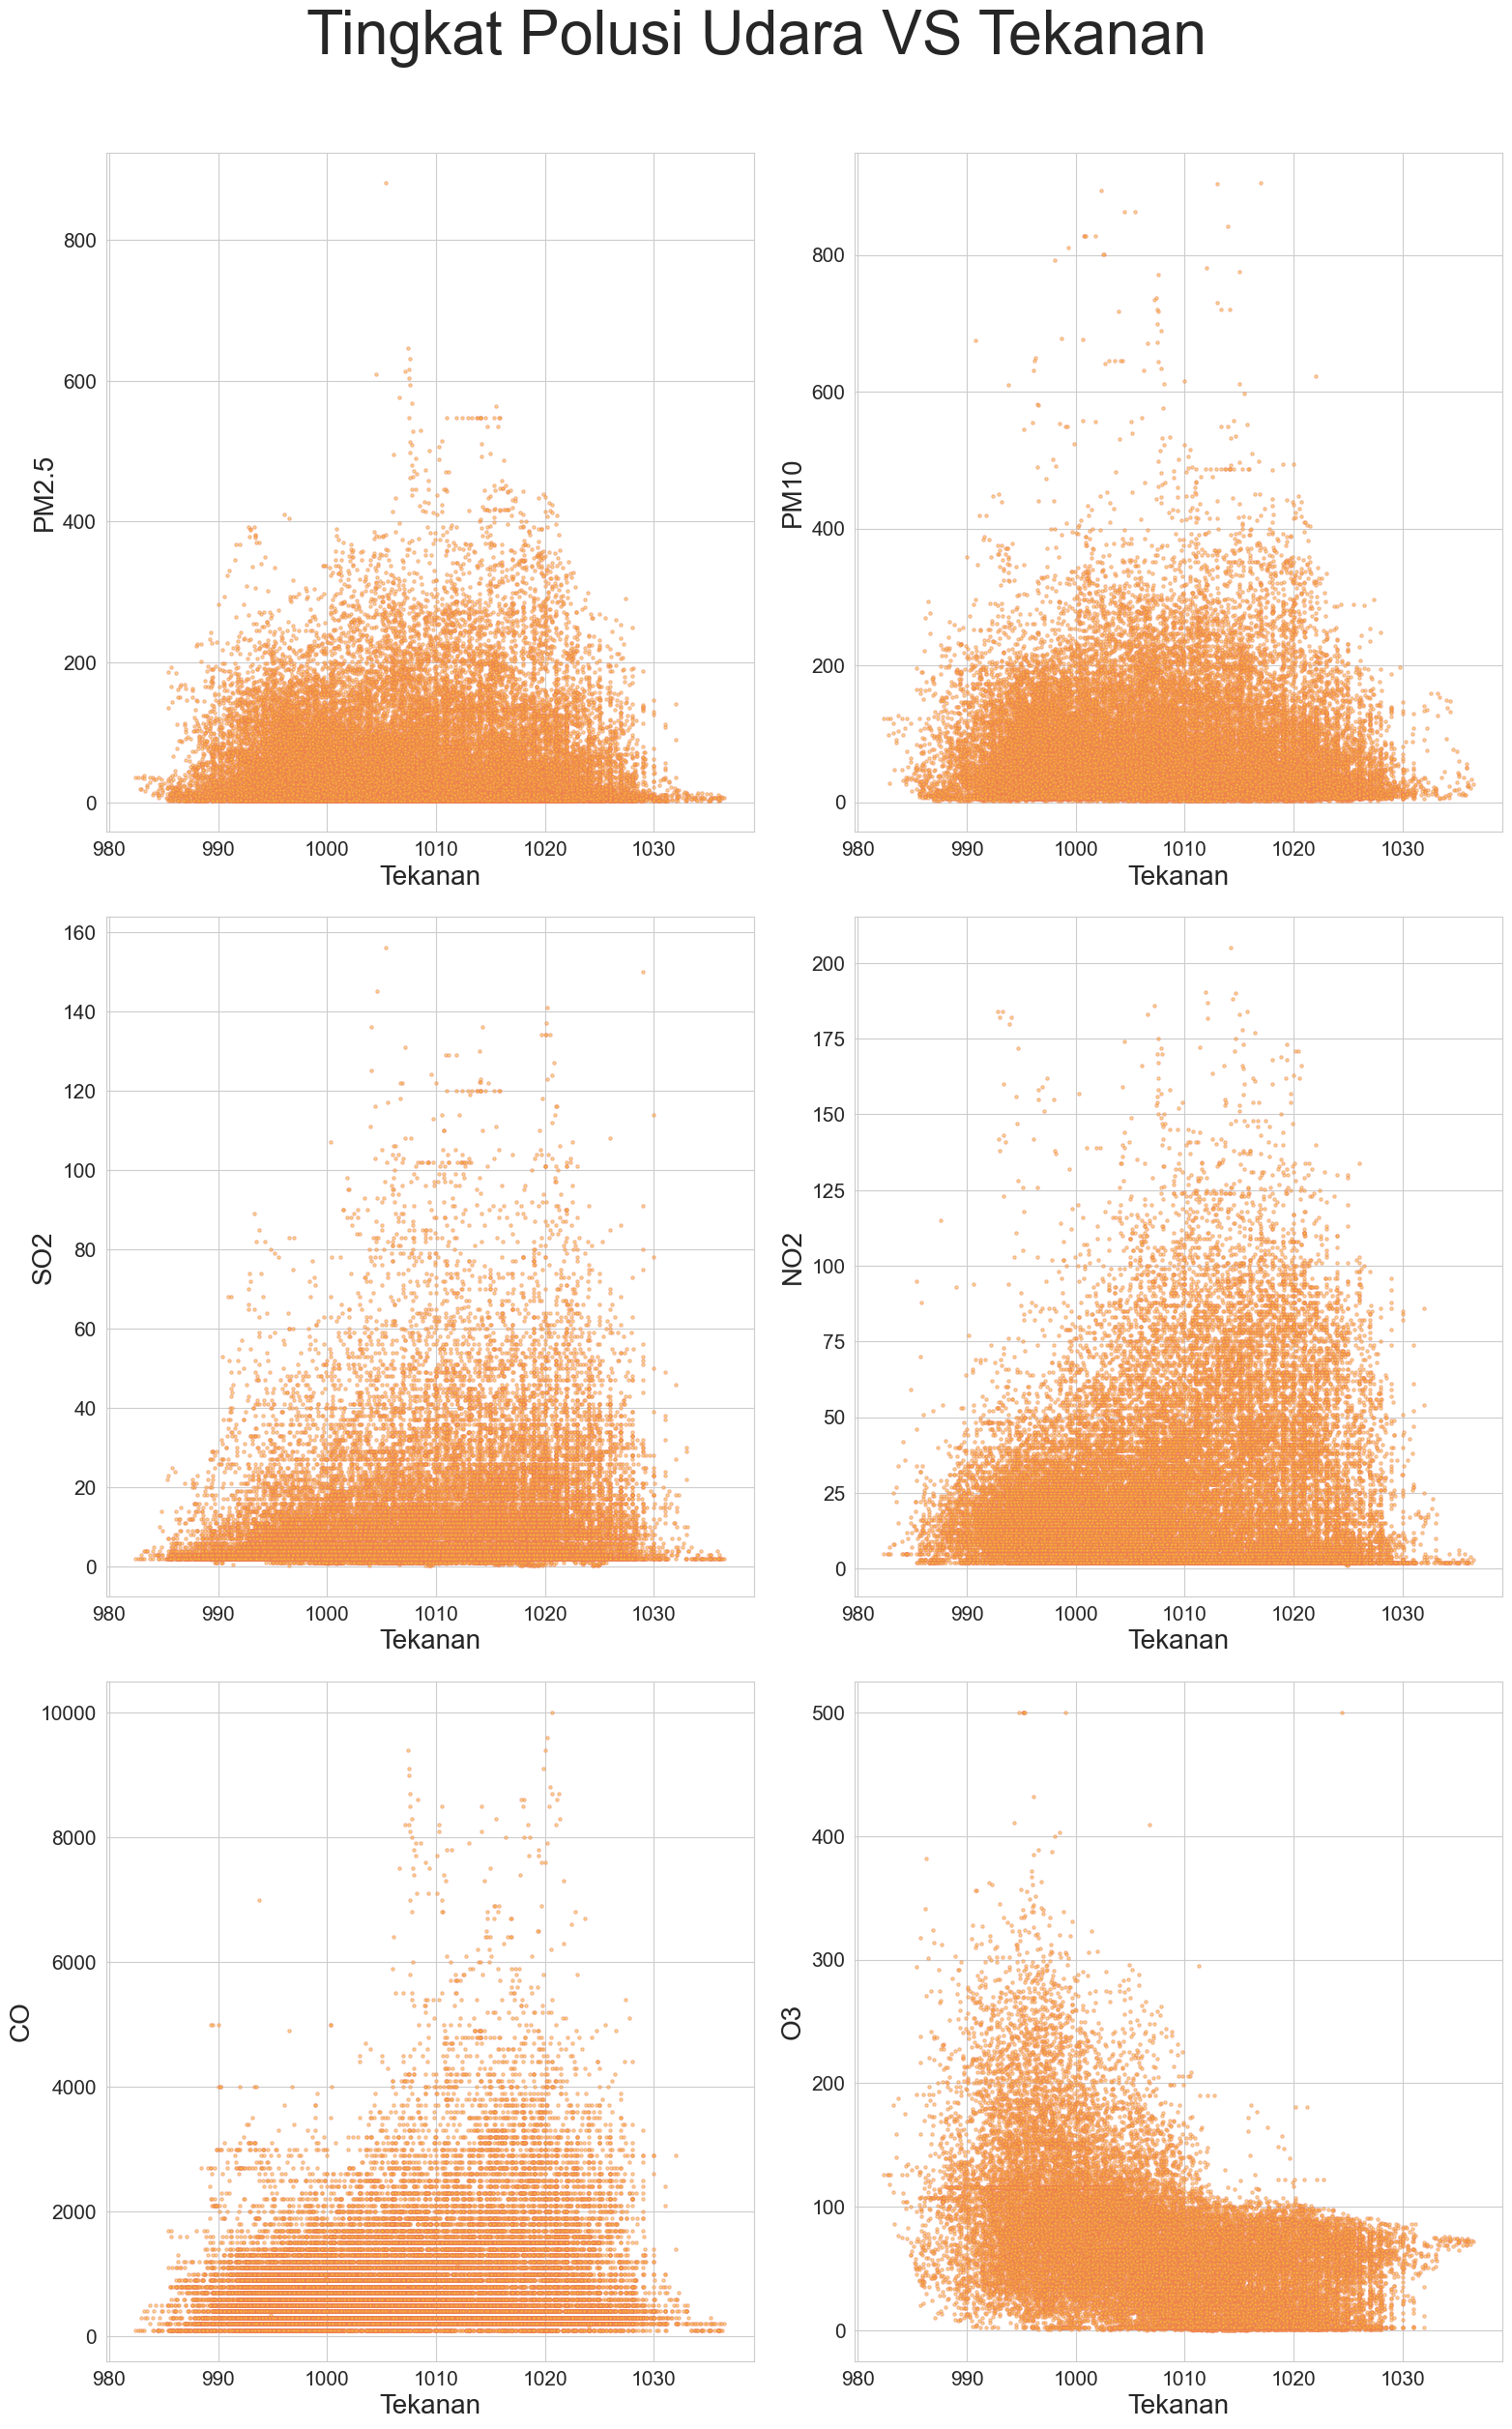

In [112]:
# Tampilan grafik scatter plot dengan menggunakan fungsi corr_scatter_graph(df)
def corr_scatter_graph(df):
    fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(16, 24))

    ax1[0,0].scatter(df['TEMP'], df['PM2.5'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax1[0,0].set_xlabel("Suhu", fontsize=20)
    ax1[0,0].set_ylabel("PM2.5", fontsize=20)
    ax1[0,0].tick_params(labelsize=15)

    ax1[0,1].scatter(df['TEMP'], df['PM10'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax1[0,1].set_xlabel("Suhu", fontsize=20)
    ax1[0,1].set_ylabel("PM10", fontsize=20)
    ax1[0,1].tick_params(labelsize=15)

    ax1[1,0].scatter(df['TEMP'], df['SO2'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax1[1,0].set_xlabel("Suhu", fontsize=20)
    ax1[1,0].set_ylabel("SO2", fontsize=20)
    ax1[1,0].tick_params(labelsize=15)

    ax1[1,1].scatter(df['TEMP'], df['NO2'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax1[1,1].set_xlabel("Suhu", fontsize=20)
    ax1[1,1].set_ylabel("NO2", fontsize=20)
    ax1[1,1].tick_params(labelsize=15)

    ax1[2,0].scatter(df['TEMP'], df['CO'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax1[2,0].set_xlabel("Suhu", fontsize=20)
    ax1[2,0].set_ylabel("CO", fontsize=20)
    ax1[2,0].tick_params(labelsize=15)

    ax1[2,1].scatter(df['TEMP'], df['O3'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax1[2,1].set_xlabel("Suhu", fontsize=20)
    ax1[2,1].set_ylabel("O3", fontsize=20)
    ax1[2,1].tick_params(labelsize=15)

    fig1.tight_layout(pad=2.0)
    plt.suptitle("Tingkat Polusi Udara VS Suhu", fontsize=45, y=1.05)
    plt.show(fig1)

    fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize=(16, 24))

    ax2[0,0].scatter(df['PRES'], df['PM2.5'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax2[0,0].set_xlabel("Tekanan", fontsize=20)
    ax2[0,0].set_ylabel("PM2.5", fontsize=20)
    ax2[0,0].tick_params(labelsize=15)

    ax2[0,1].scatter(df['PRES'], df['PM10'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax2[0,1].set_xlabel("Tekanan", fontsize=20)
    ax2[0,1].set_ylabel("PM10", fontsize=20)
    ax2[0,1].tick_params(labelsize=15)

    ax2[1,0].scatter(df['PRES'], df['SO2'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax2[1,0].set_xlabel("Tekanan", fontsize=20)
    ax2[1,0].set_ylabel("SO2", fontsize=20)
    ax2[1,0].tick_params(labelsize=15)

    ax2[1,1].scatter(df['PRES'], df['NO2'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax2[1,1].set_xlabel("Tekanan", fontsize=20)
    ax2[1,1].set_ylabel("NO2", fontsize=20)
    ax2[1,1].tick_params(labelsize=15)

    ax2[2,0].scatter(df['PRES'], df['CO'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax2[2,0].set_xlabel("Tekanan", fontsize=20)
    ax2[2,0].set_ylabel("CO", fontsize=20)
    ax2[2,0].tick_params(labelsize=15)

    ax2[2,1].scatter(df['PRES'], df['O3'], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
    ax2[2,1].set_xlabel("Tekanan", fontsize=20)
    ax2[2,1].set_ylabel("O3", fontsize=20)
    ax2[2,1].tick_params(labelsize=15)

    fig2.tight_layout(pad=2.0)
    plt.suptitle("Tingkat Polusi Udara VS Tekanan", fontsize=45, y=1.05)
    plt.show(fig2)

corr_scatter_graph(korelasi_df)


### Pertanyaan 4 : Pada bulan dan jam berapa tingkat PM2.5 dan PM10 di kota dingling cenderung tinggi dari tahun 2013 hingga 2017?

C:\Users\wilda\AppData\Local\Temp\ipykernel_3808\137166361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(data= df, x= df['time_span'], y= df['PM2.5'], palette= warna, ax= ax[0], orient= 'v')
C:\Users\wilda\AppData\Local\Temp\ipykernel_3808\137166361.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p= sns.barplot(data= df, x = df['time_span'], y= df['PM10'], palette= warna, ax=ax[1], orient = 'v')


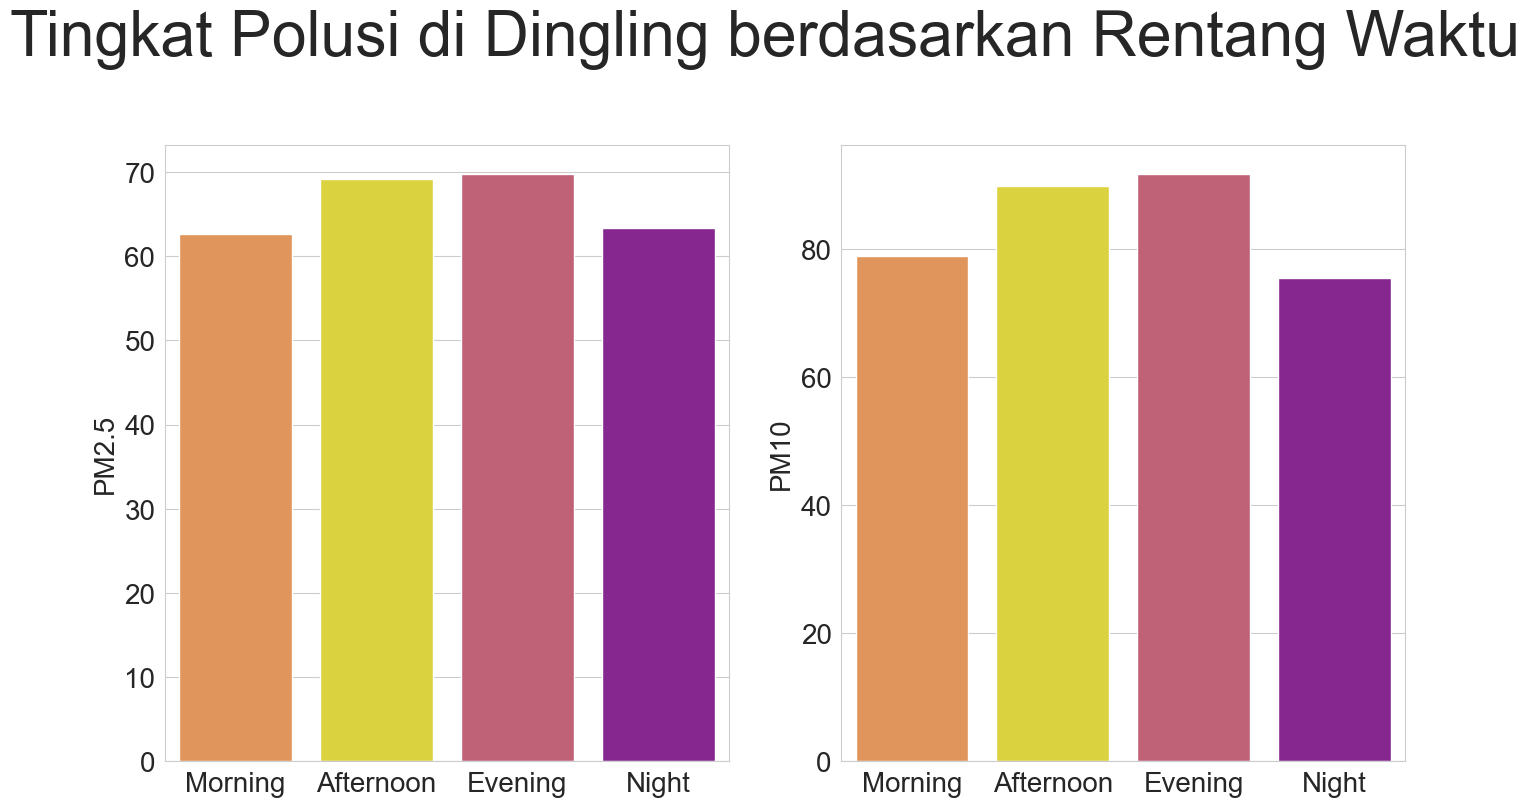

In [113]:
def timespan_bar_graph(df):
    warna = ['#F59245', '#F5E926','#CE5270','#9316A0']
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    p = sns.barplot(data= df, x= df['time_span'], y= df['PM2.5'], palette= warna, ax= ax[0], orient= 'v')
    p.tick_params(axis='y', labelsize=20)
    p.tick_params(axis='x', labelsize=20)
    p.set_xlabel(None)
    p.set_ylabel("PM2.5", fontsize = 20)

    p= sns.barplot(data= df, x = df['time_span'], y= df['PM10'], palette= warna, ax=ax[1], orient = 'v')
    p.tick_params(axis='y', labelsize=20)
    p.tick_params(axis='x', labelsize=20)
    p.set_xlabel(None)
    p.set_ylabel("PM10", fontsize = 20)

    plt.suptitle("Tingkat Polusi di Dingling berdasarkan Rentang Waktu", fontsize=45, y=1.05)
    plt.show()

timespan_bar_graph(timespan_particle_df)


###  Pertanyaan 5: Bagaimana distribusi arah angin di kota dingling dari tahun 2013 hingga 2017?

C:\Users\wilda\AppData\Local\Temp\ipykernel_3808\3713032541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= df['percent'], y= df['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')


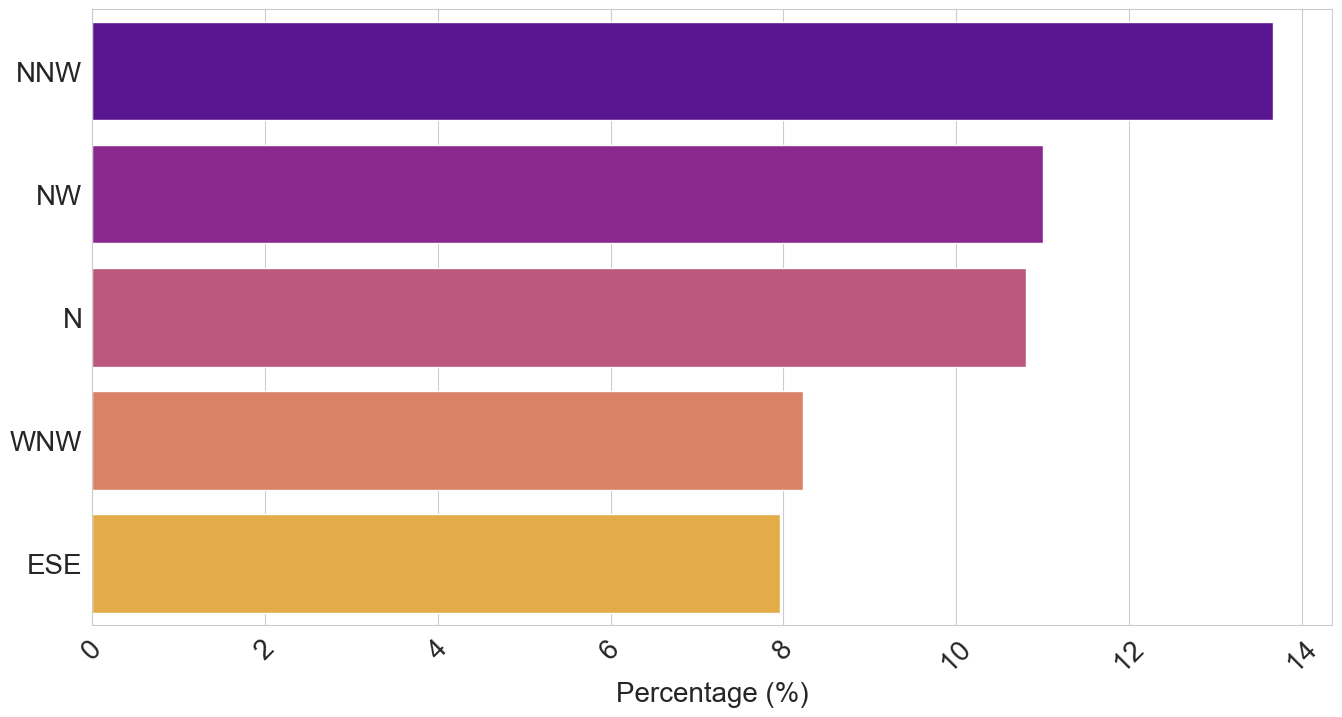

In [114]:
def winddirection_barh_graph(df):
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(data= df, x= df['percent'], y= df['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax.set_ylabel(None)
    ax.set_xlabel("Percentage (%)", fontsize = 20)
    plt.show()

winddirection_barh_graph(wind_direction_df.head(5))


### Pertanyaan 6: Bagaimana tren kecepatan angin di kota dingling setiap bulan dari tahun 2013 hingga 2017?

In [115]:
# Menghitung distribusi arah angin dari tahun 2013 hingga 2017
wind_direction_df = dingling.groupby('wd').size().reset_index(name='count')
total_count = wind_direction_df['count'].sum()
wind_direction_df['percent'] = (wind_direction_df['count'] / total_count) * 100
wind_direction_df = wind_direction_df.rename(columns={'wd': 'wind_direction'})

# Menampilkan 5 data teratas untuk visualisasi
wind_direction_df.head(5)


wind_direction  count    percent
0              E   2431   6.933037
1            ENE   1310   3.736026
2            ESE   2790   7.956879
3              N   3791  10.811659
4             NE   1735   4.948095

C:\Users\wilda\AppData\Local\Temp\ipykernel_3808\298906468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= df['percent'], y= df['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')


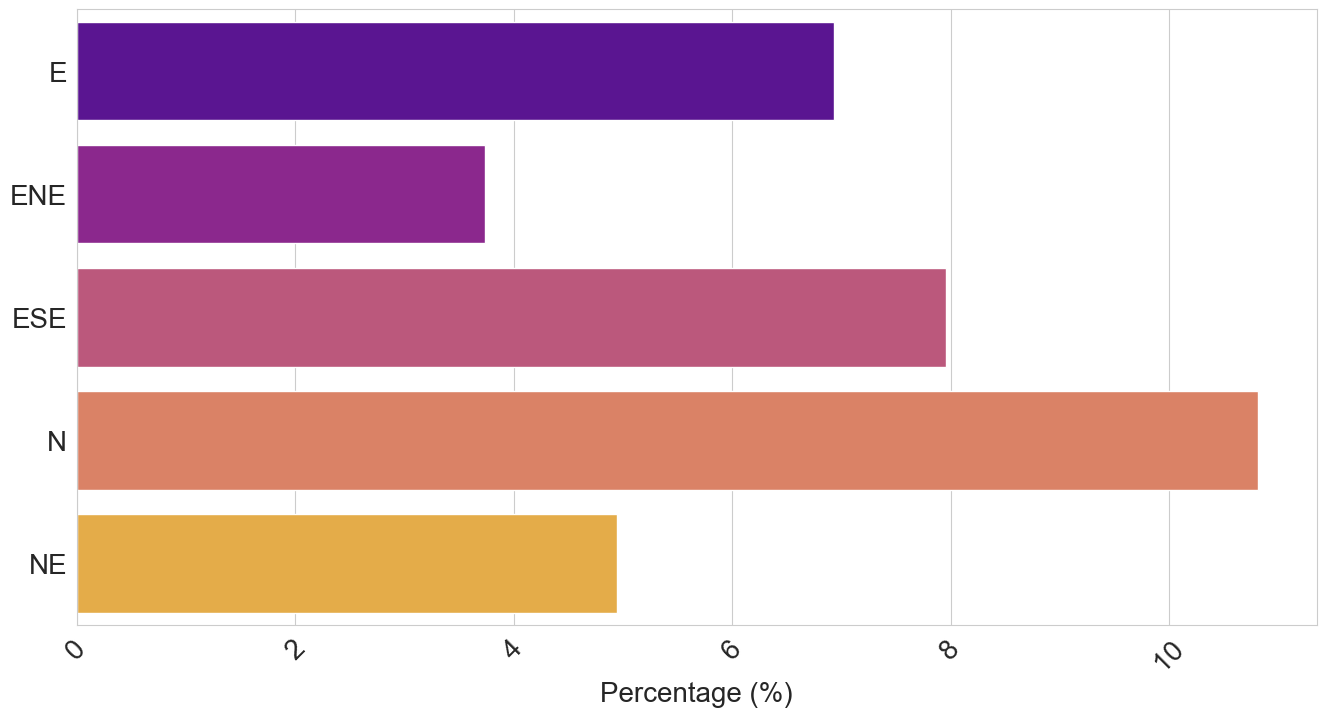

In [116]:
def winddirection_barh_graph(df):
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(data= df, x= df['percent'], y= df['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax.set_ylabel(None)
    ax.set_xlabel("Percentage (%)", fontsize = 20)
    plt.show()

# Menampilkan grafik distribusi arah angin untuk 5 data teratas
winddirection_barh_graph(wind_direction_df.head(5))


## Conclusion

- Dinamika tingkat polusi udara di Kota Dingling menunjukkan tren yang fluktuatif. Meskipun demikian, analisis rata-rata parameter polusi udara PM2.5 dan PM10 selama periode 2013-2017 mengungkapkan kondisi yang tidak sehat untuk PM2.5 dan sedang untuk PM10.
- Dinamika perubahan suhu udara di Kota Dingling menunjukkan pola yang fluktuatif. Meskipun demikian, analisis rata-rata suhu udara selama periode 2013-2017 menunjukkan bahwa suhu tertinggi tercapai pada tahun 2014. Di sisi lain, pola perubahan tekanan udara tidak menunjukkan tren yang signifikan.
- Secara umum, hubungan antara tingkat polusi dan parameter suhu udara di Kota Dingling menunjukkan korelasi yang lemah. Nilai korelasinya umumnya berada dalam rentang -0,5 hingga 0,5, mengindikasikan hubungan yang tidak signifikan. Namun, terdapat pengecualian, yaitu pada parameter O3 dan suhu, di mana nilai korelasi Pearson mencapai 0,59. Hal ini menunjukkan adanya hubungan positif yang cukup kuat antara tingkat polusi O3 dan suhu udara.
- Berdasarkan analisis data PM2.5, konsentrasi partikulat teramati paling tinggi pada rentang waktu 17.00-23.00, yang dikategorikan sebagai periode sore hari (evening). Sedangkan untuk data PM10, konsentrasi partikulat teramati paling tinggi pada rentang waktu 00.00-05.00, yang dikategorikan sebagai periode malam hari (night)
- Berdasarkan analisis data meteorologi, pola arah angin di Kota Dingling selama periode 2013-2017 menunjukkan kecenderungan bertiup ke arah NNW (North-Northwest).
- Kecepatan angin cenderung berubah namun tidak signifikan